# DeFi Lending Protocol Rates Forecaster with ZKML (Compound V2)

## Rationale

The decentralized finance (DeFi) sector has rapidly grown to challenge traditional financial systems, which is enabled through blockchain-based execution of financial transactions. From within the DeFi ecosystem, Compound V2 is one of the major protocols that allows users to lend and borrow cryptocurrencies. The fundamental part of this platform is the dynamic interest rates for supplying and borrowing assets, which are subject to change based on market demand and supply. Both parties, lenders and borrowers, need to be able to make decisions and manage risks while being able to predict interest rates to optimize the returns of investments or loans. This project is going to apply machine learning techniques for predicting the supply and borrow rates on Compound V2 in order to provide insights into future market conditions.

## Objectives

1. <b>Data Collection and Preparation</b>: Gather historical rates of supply and borrowing across various assets for which a user can provide liquidity or an emergency fund, rates at which they can borrow any asset, totals of how much is borrowed and supplied, and anything else that's important from Compound V2. Feature Engineering: Create and refine features that relate to all issues and markets defining interest rates—for example, the ability of the tool to predict rates from the current back log of rates, data from any volume metric, and created statistical measurements—to enable data analysis of any kind.

2. <b>Model Development and Validation</b>: Design, train, and validate machine learning models able to predict future supply and borrow rates. This contains assessing various algorithms and tuning model parameters for reaching highest performance.

3. <b>Analysis and Interpretation</b>: Discuss the outputs of the model to understand the importance of each feature and how varied aspects influence interest rates in DeFi markets.

4. <b>Deployment and Monitoring</b>: Perform actual deployment of the top-performing models into real-time production, so as to maintain producing forecasts on interest rates at any given time over continuously retraining or developing new models on incoming data.

## Potential Use Cases

1. <b>Risk Management for Lenders and Borrowers</b>: By forecasting the interest rates, lenders and borrowers will be able to better assess the risk associated with their positions and make more informed decisions regarding their investments and loans.

2. <b>Portfolio Optimization</b>: Use rate forecasts to optimize portfolios. Allocations of the funds by the investors can be done in such a way as to maximize returns in accordance with forecasted interest rates by the assets.

3. <b>Algorithmic Trading</b>: This will give traders a way of utilizing interest rate forecasts in their trading algorithms to exploit arbitrage and therefore adjust the strategies depending on the expected fluctuations in borrowing costs.

4. <b>Financial Planning and Strategy</b>: Interest rate forecasts will help guide strategic decisions at DeFi platforms and by financial analysts, ranging from capital allocation, liquidity management, and product offering.

5. <b>Policy and Governance</b>: Governance token holders and protocol developers can use forecasts to make informed decisions for changes in the interest rate model, incentives, and other parameters of protocols to ensure long-term sustainability and competitiveness.

In [1]:
import warnings
import numpy as np
import pandas as pd
from giza_datasets import DatasetsLoader
from giza_actions.action import Action, action
from giza_actions.task import task

# Load Compound Daily Interest Rates
loader = DatasetsLoader()
df = loader.load('compound-daily-interest-rates')

# Specific warning to ignore, e.g., for fillna method
warnings.filterwarnings('ignore', category=FutureWarning)

09:46:13.059 | WARNING | Compute Engine Metadata server unavailable on attempt 1 of 3. Reason: [WinError 10065] A socket operation was attempted to an unreachable host

09:46:13.069 | WARNING | Compute Engine Metadata server unavailable on attempt 2 of 3. Reason: [WinError 10065] A socket operation was attempted to an unreachable host

09:46:13.092 | WARNING | Compute Engine Metadata server unavailable on attempt 3 of 3. Reason: [WinError 10065] A socket operation was attempted to an unreachable host

09:46:13.095 | WARNING | Authentication failed using Compute Engine authentication due to unavailable metadata server.

09:46:13.111 | WARNING | Compute Engine Metadata server unavailable on attempt 1 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AF7DE1C8D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:46:13.116 | WARNING | Compute Engine Metadata server unavailable on attempt 2 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AF7DE1E810>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:46:13.122 | WARNING | Compute Engine Metadata server unavailable on attempt 3 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AF7DE48510>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:46:13.128 | WARNING | Compute Engine Metadata server unavailable on attempt 4 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AF7DE49DD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:46:13.132 | WARNING | Compute Engine Metadata server unavailable on attempt 5 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AF7DE1E4D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

Dataset read from cache.
Loading dataset compound-daily-interest-rates from cache.


In [2]:
compound_daily_interest_rates = df.to_pandas()

## Data Cleaning

In [3]:
@task(name=f"Nan Report")
def generate_nan_report(df, display_report=True, return_report=False):
    """
    Generates and displays a report of missing values (NaNs) in the given DataFrame.

    Parameters:
    - df: DataFrame for which the NaN report will be generated.
    - display_report: If True, displays the NaN report. Default is True.
    - return_report: If True, returns the NaN report DataFrame. Default is False.

    Returns:
    - Optionally returns a DataFrame containing the NaN report if return_report is True.
    """
    nan_counts = df.isna().sum()  # Count NaNs per column
    nan_percentage = (nan_counts / len(df)) * 100  # Calculate percentage of NaNs

    # Creating the NaN report DataFrame
    nan_report = pd.DataFrame({
        'Missing Values': nan_counts,
        'Percentage (%)': nan_percentage
    })

    # Displaying the report
    if display_report:
        pd.set_option('display.max_rows', None)  # Set to display all rows
        display(nan_report)
        pd.reset_option('display.max_rows')  # Reset to default setting

    # Returning the report DataFrame if requested
    if return_report:
        return nan_report

# Display the NaN report
display(generate_nan_report.fn(compound_daily_interest_rates))

# Report on value_counts for each of the columns that are of type string or categorical data type
value_counts_report = {}
for column in compound_daily_interest_rates.select_dtypes(include=['object']).columns:
    value_counts_report[column] = compound_daily_interest_rates[column].value_counts()

# Displaying the data type of each column
print(compound_daily_interest_rates.dtypes)

# Displaying all of the value_counts_report
for key, value in value_counts_report.items():
    print(f"Value counts for {key}:\n{value}\n")

#Let's drop block_number variable/feature since it won't give that much information on training our model.
compound_daily_interest_rates.drop('block_number', axis=1, inplace=True)

,Missing Values,Percentage (%)
symbol,0,0.0
totalBorrows,0,0.0
borrowRate,0,0.0
totalSupply,0,0.0
supplyRate,0,0.0
underlyingPriceUSD,0,0.0
exchangeRate,0,0.0
timestamp,0,0.0
block_number,0,0.0
totalSupplyUnderlying,0,0.0


None

symbol                    object
totalBorrows             float64
borrowRate               float64
totalSupply              float64
supplyRate               float64
underlyingPriceUSD       float64
exchangeRate             float64
timestamp                  int64
block_number               int64
totalSupplyUnderlying    float64
totalSupplyUSD           float64
totalBorrowUSD           float64
dtype: object
Value counts for symbol:
symbol
cDAI      3239
cWBTC     2692
cREP      1722
cUSDC     1722
cETH      1722
cBAT      1722
cZRX      1722
cUSDT     1362
cUNI      1207
cCOMP     1193
cTUSD      977
cLINK      976
cSUSHI     902
cYFI       902
cAAVE      902
cUSDP      764
cFEI       712
Name: count, dtype: int64



It seems the data is already clean and no NAN values are present. Now lets explore if the data contain any duplicate entries.

In [4]:
# Check how many duplicates are there in the dataset
duplicates_count = compound_daily_interest_rates.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicates and retain the first occurrence
compound_daily_interest_rates_no_dup = compound_daily_interest_rates.drop_duplicates()
print("Duplicates dropped. First occurrence retained.")

Number of duplicate rows: 0
Duplicates dropped. First occurrence retained.


## Data Visualization

### Borrow Rate and Supply Rate Graph and Distribution by Symbol

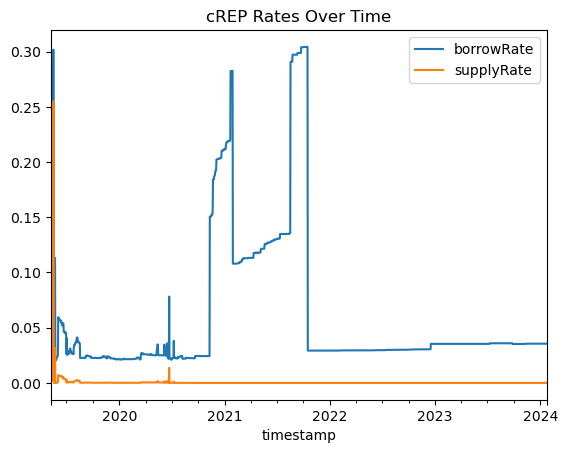

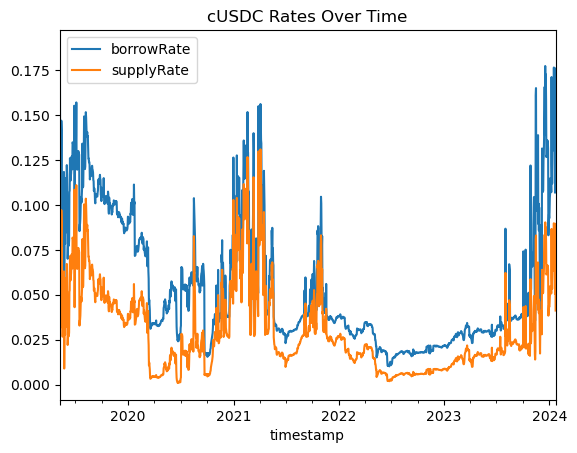

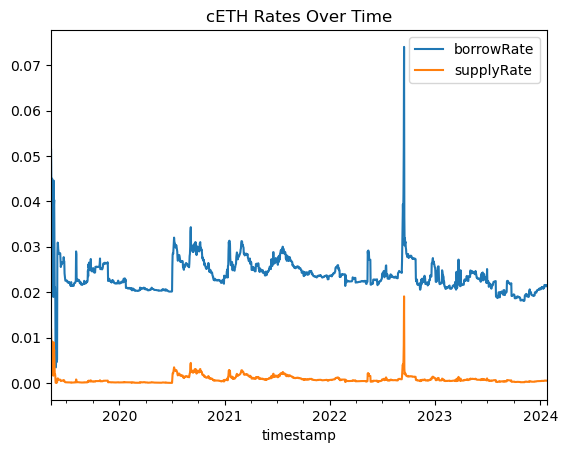

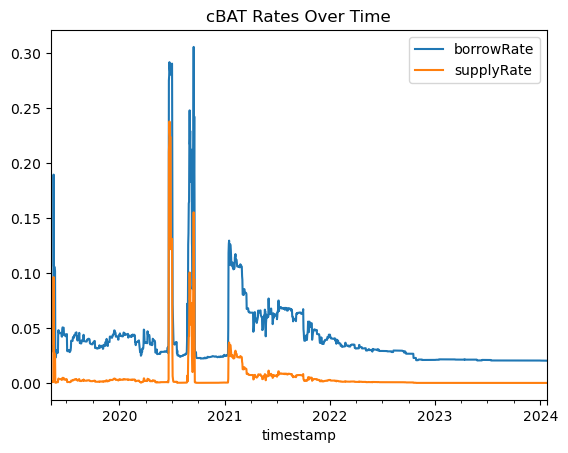

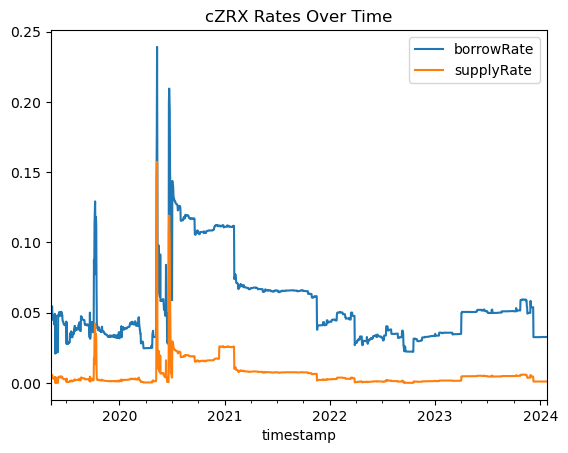

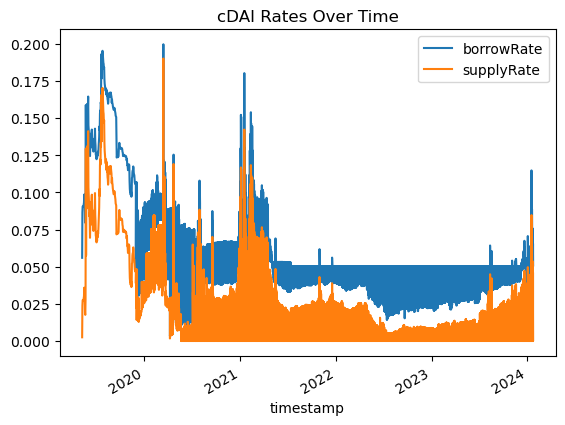

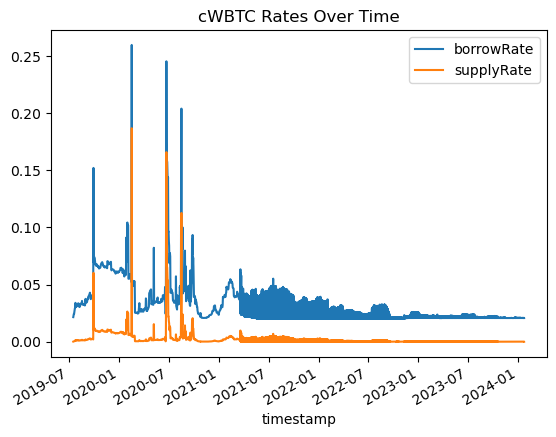

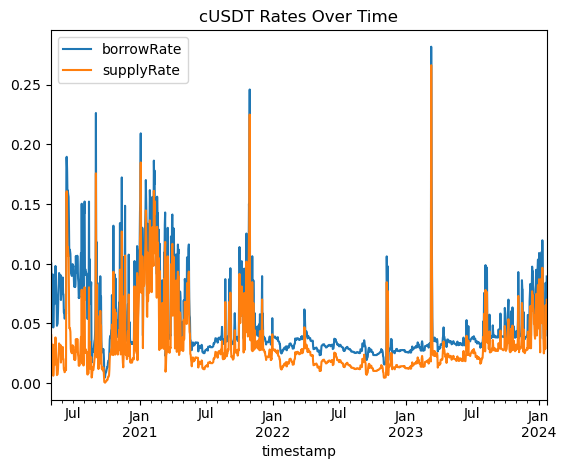

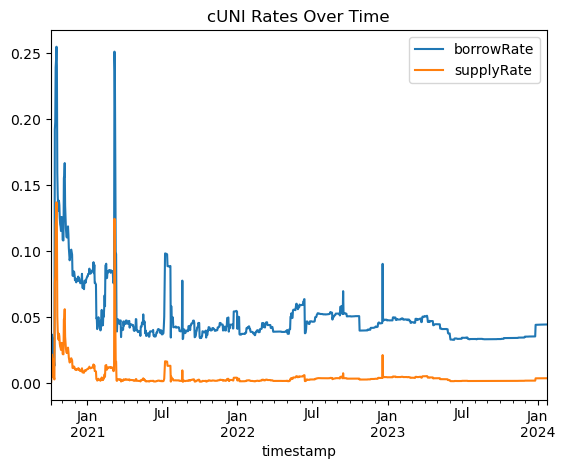

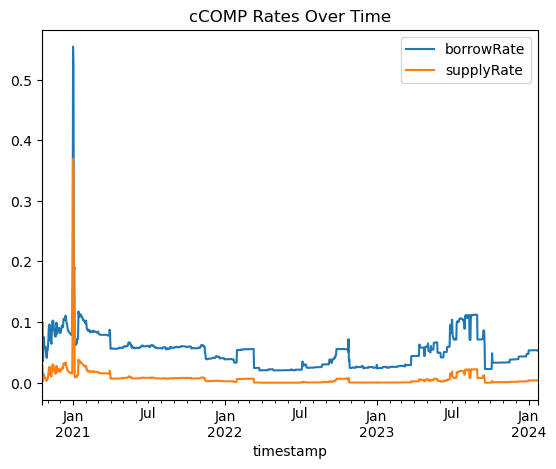

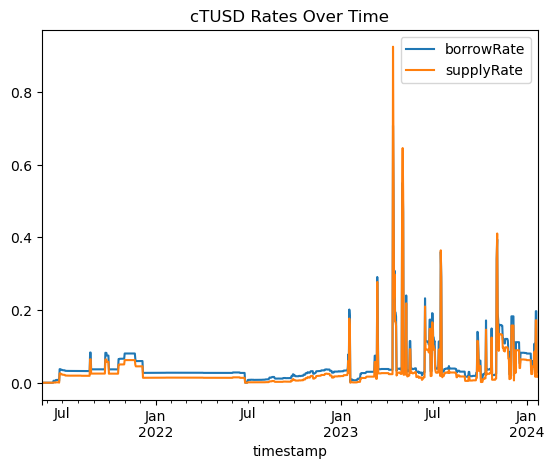

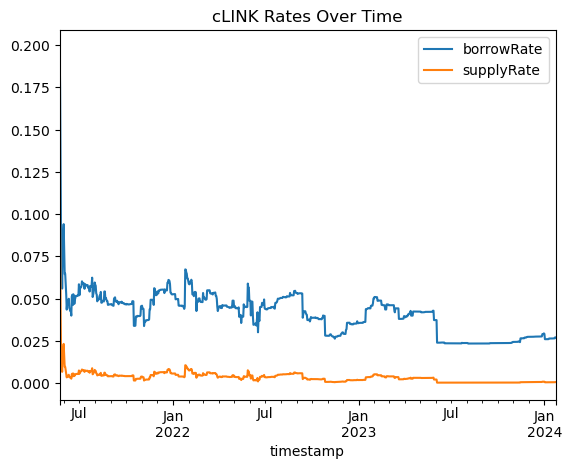

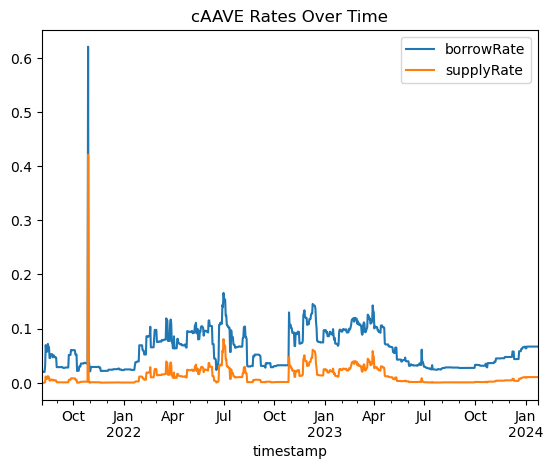

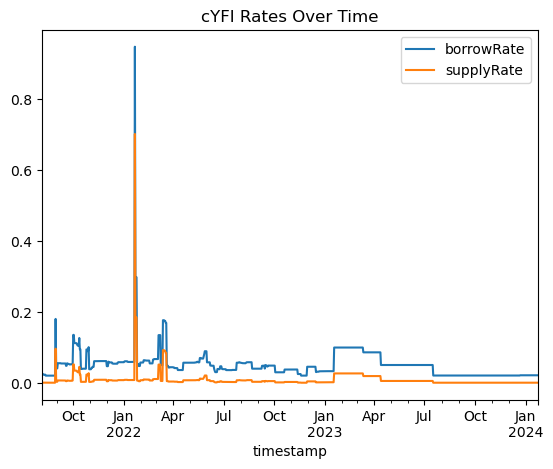

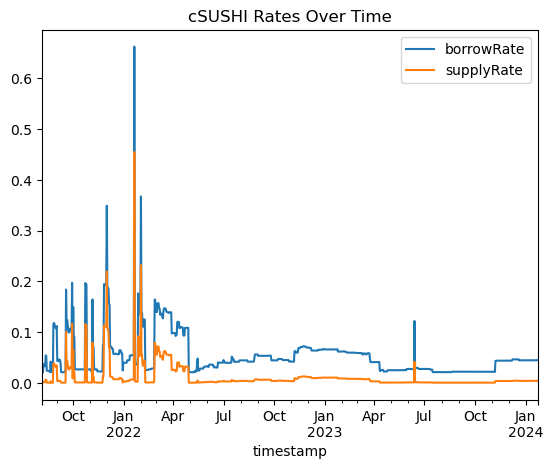

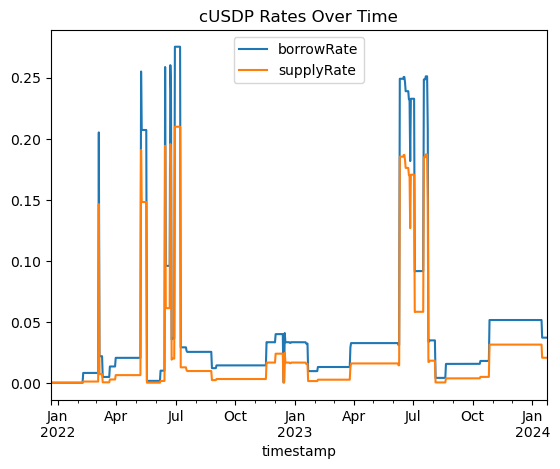

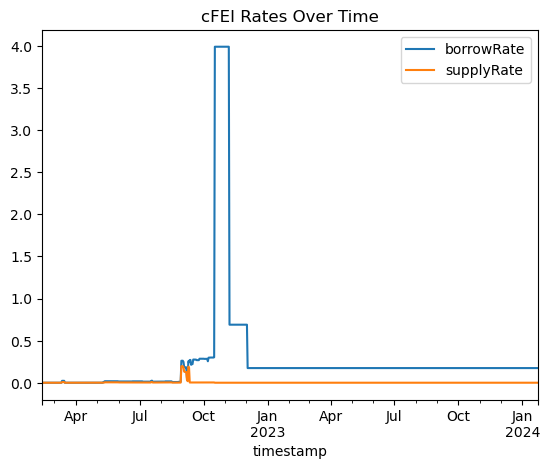

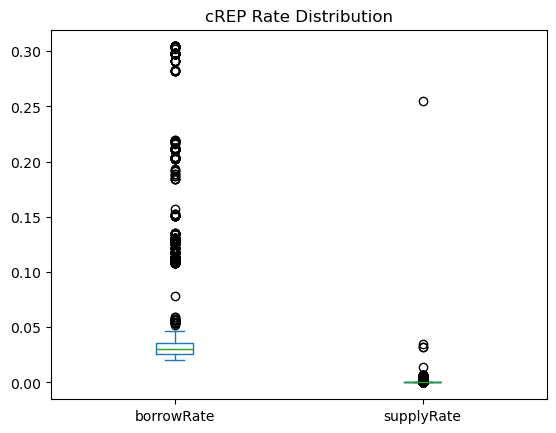

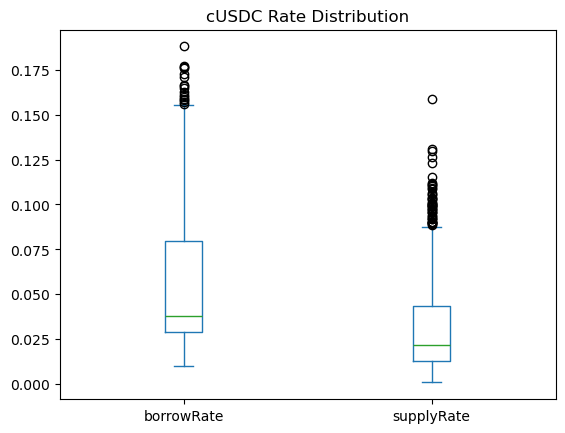

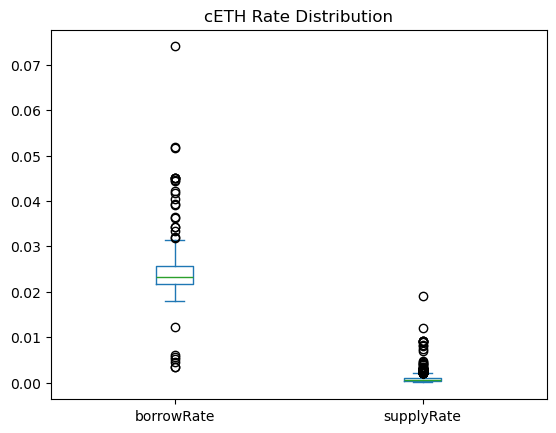

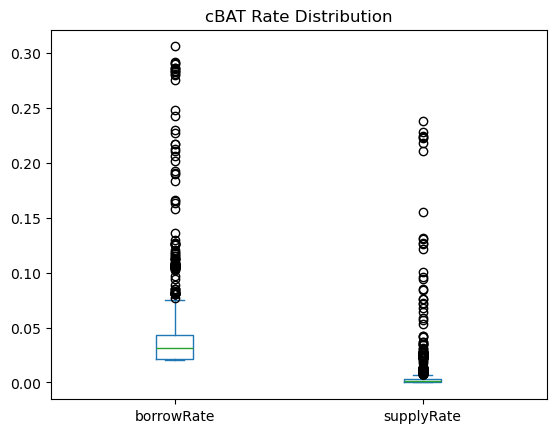

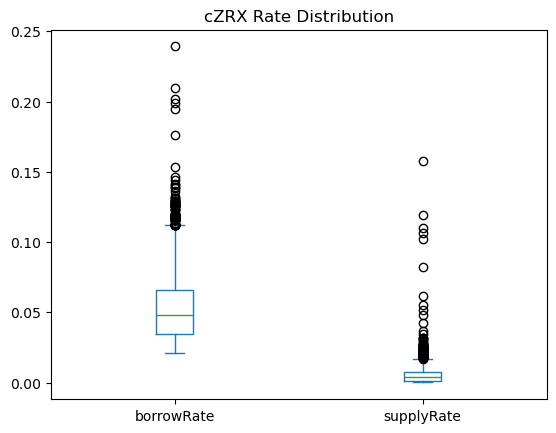

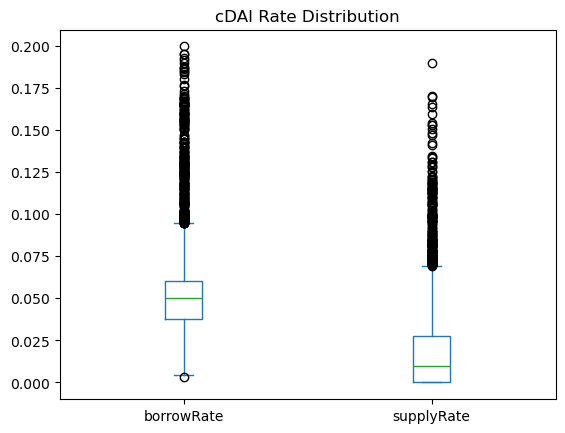

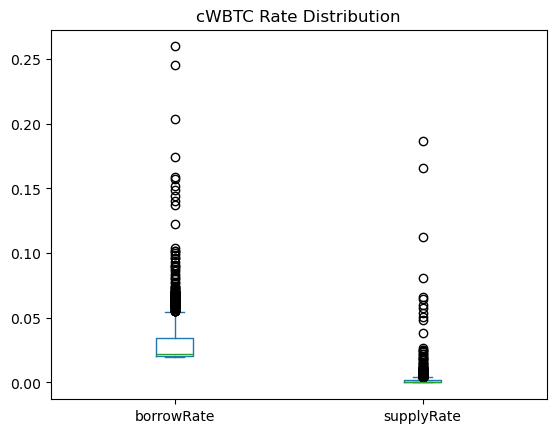

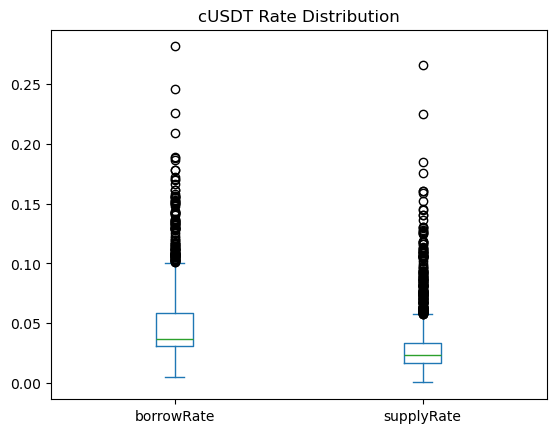

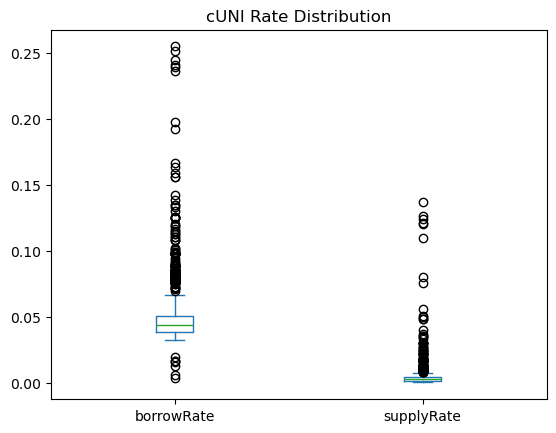

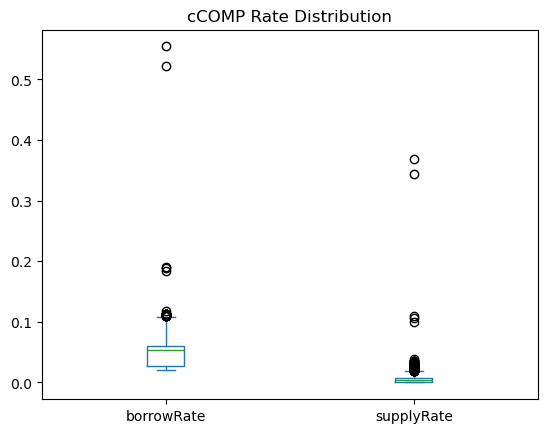

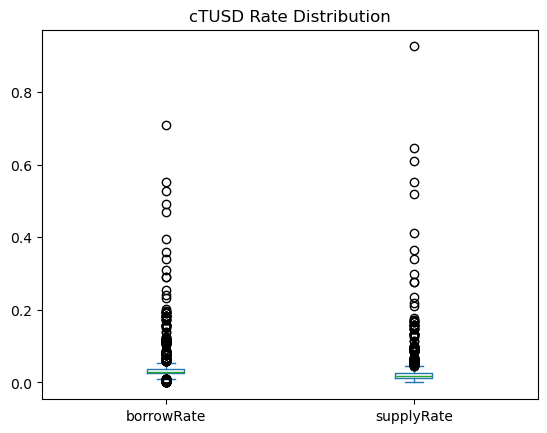

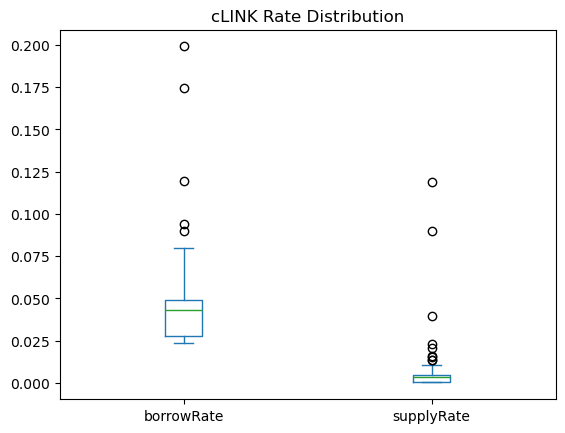

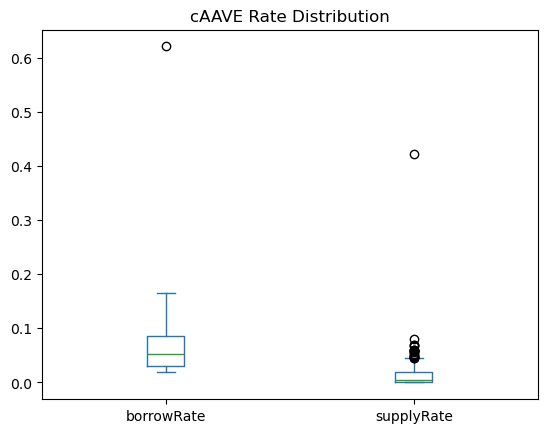

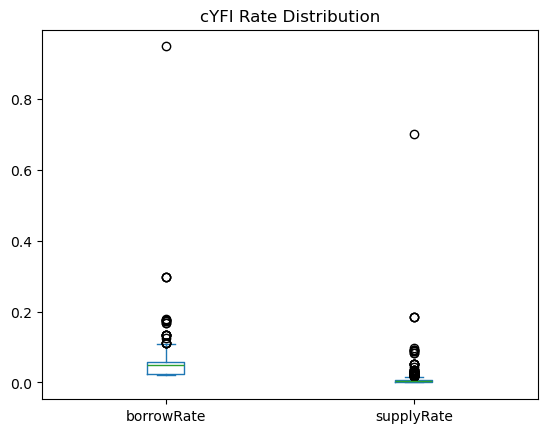

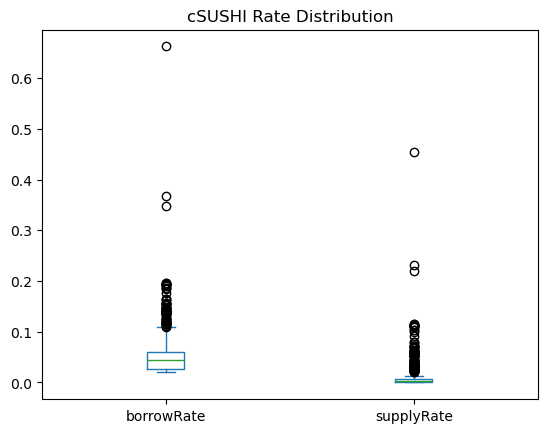

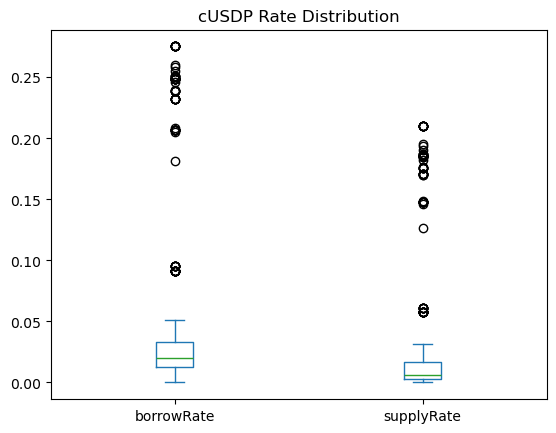

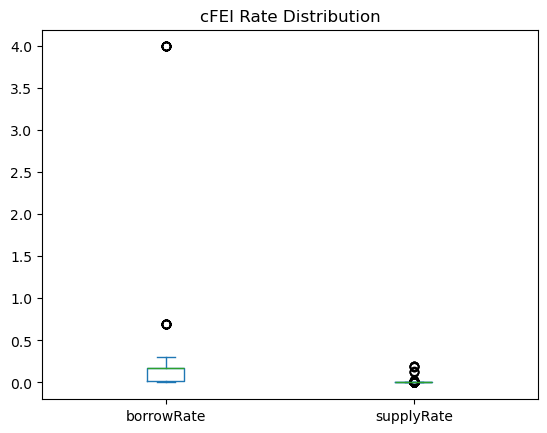

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

compound_daily_interest_rates['timestamp'] = pd.to_datetime(compound_daily_interest_rates['timestamp'], unit='s')
compound_daily_interest_rates.sort_values(by='timestamp', inplace=True)

symbols = compound_daily_interest_rates['symbol'].unique()
for symbol in symbols:
    symbol_data = compound_daily_interest_rates[compound_daily_interest_rates['symbol'] == symbol]
    symbol_data.set_index('timestamp')[['borrowRate', 'supplyRate']].plot(title=f"{symbol} Rates Over Time")
    plt.show()

for symbol in symbols:
    symbol_data = compound_daily_interest_rates[compound_daily_interest_rates['symbol'] == symbol]
    symbol_data[['borrowRate', 'supplyRate']].plot(kind='box', title=f"{symbol} Rate Distribution")
    plt.show()


### Borrow Rate and Supply Rate (7-day Rolling Average) Graph

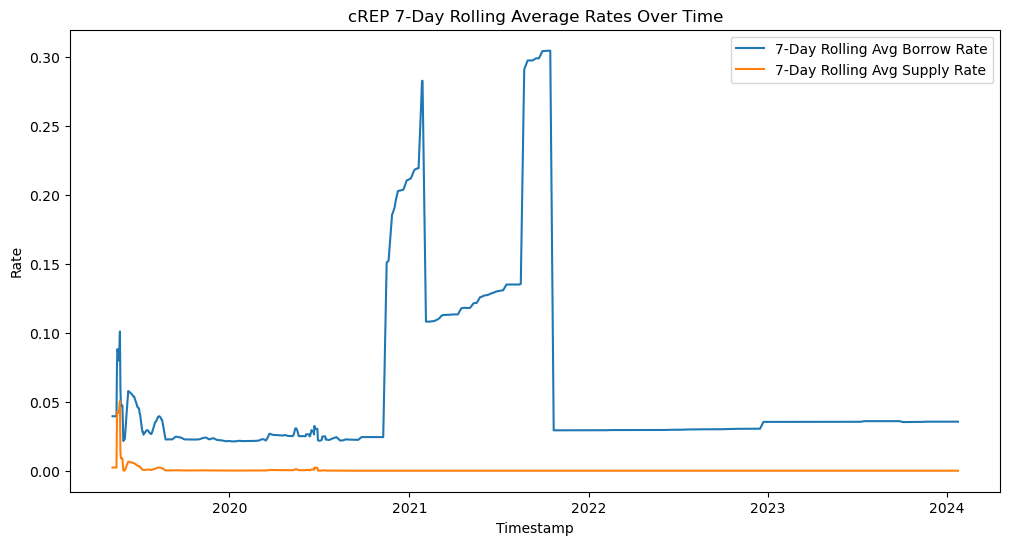

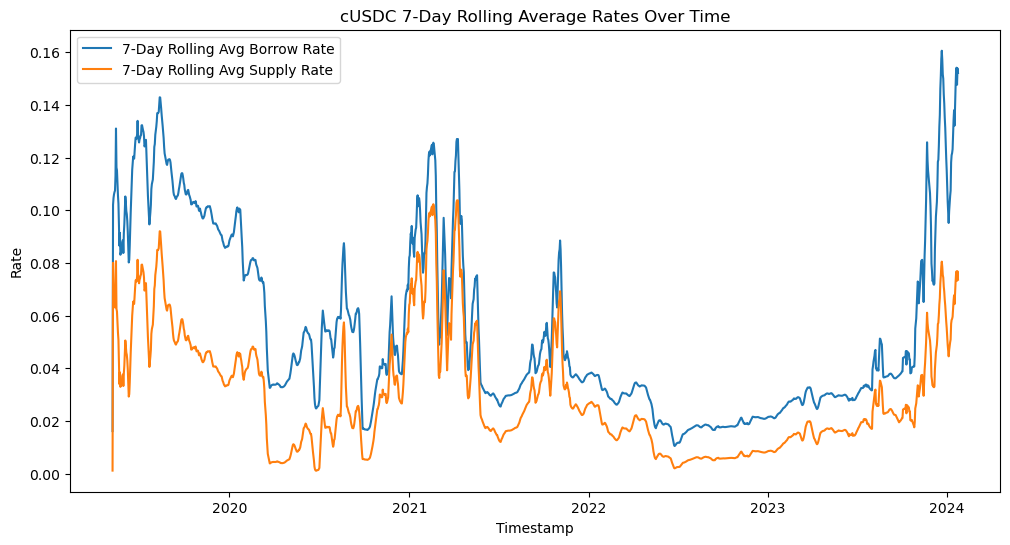

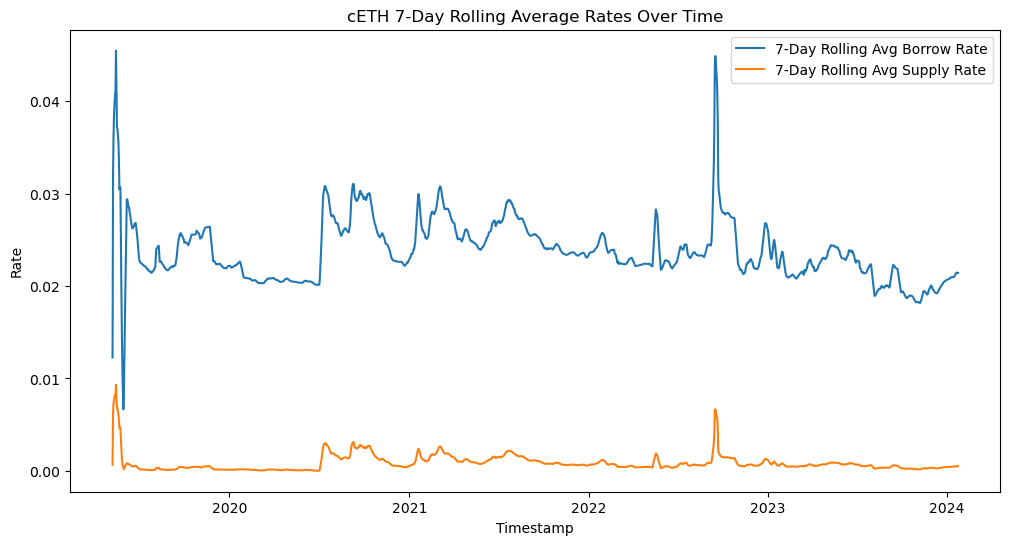

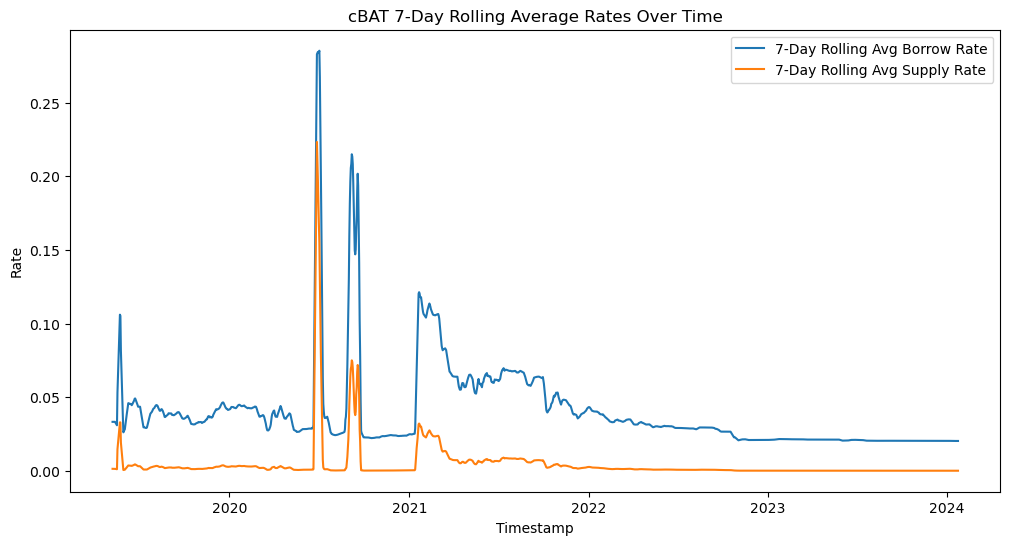

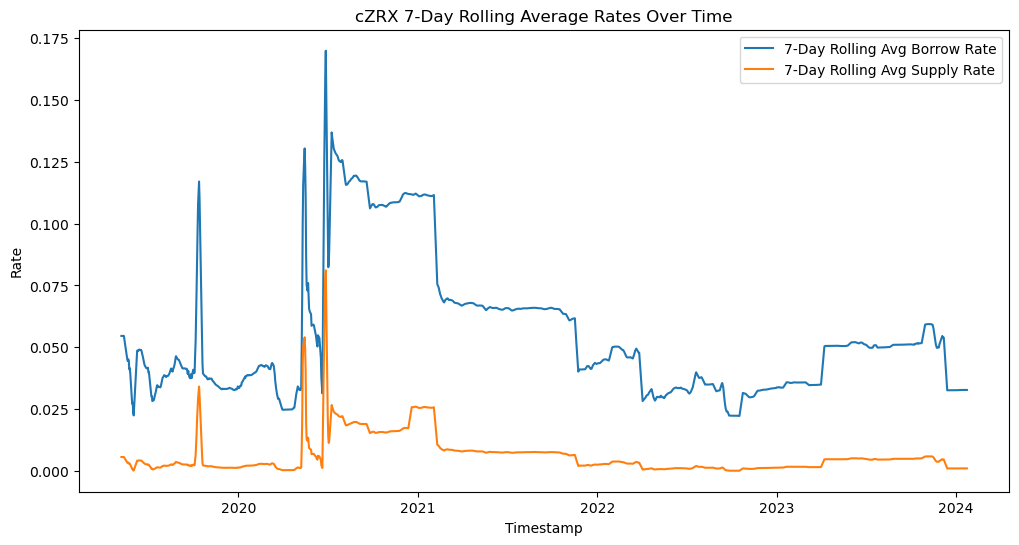

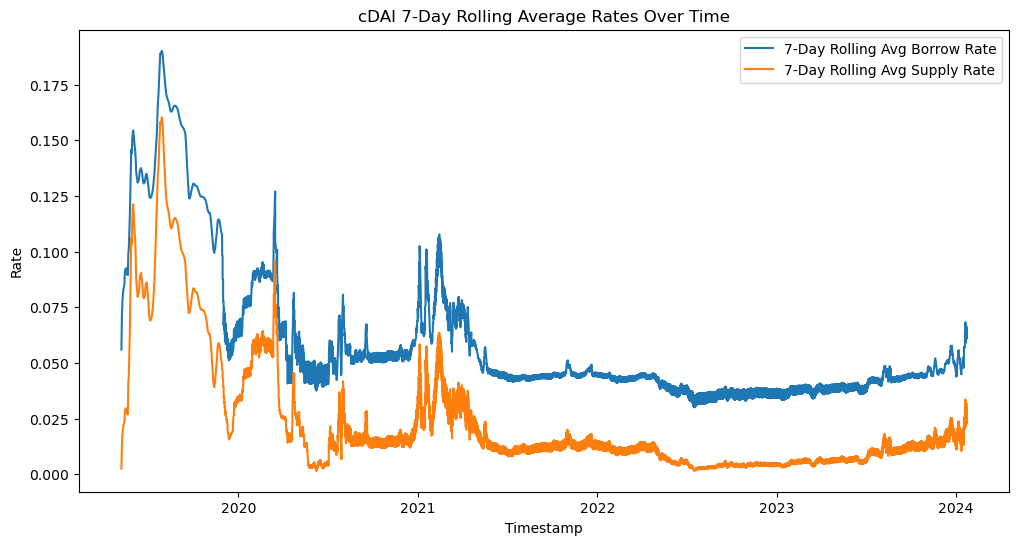

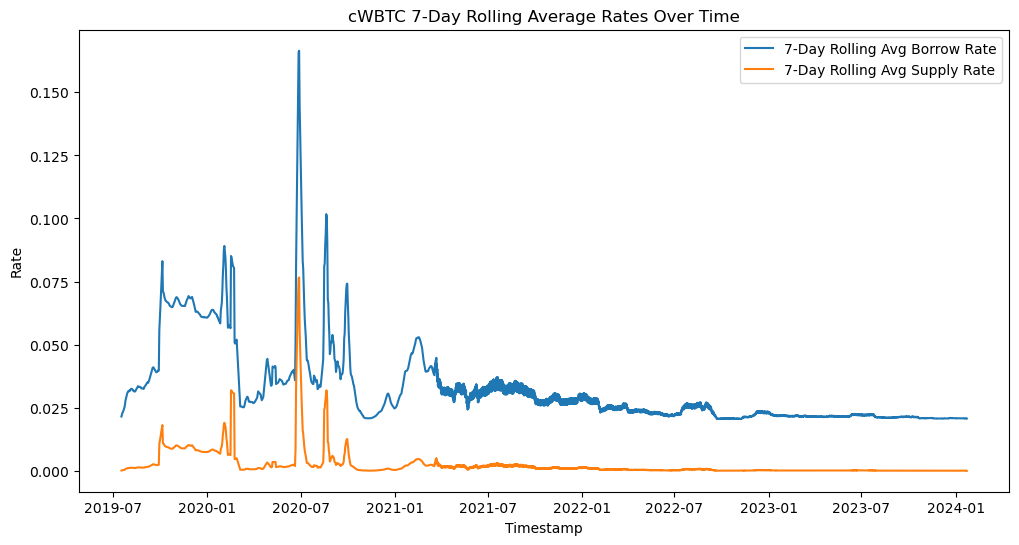

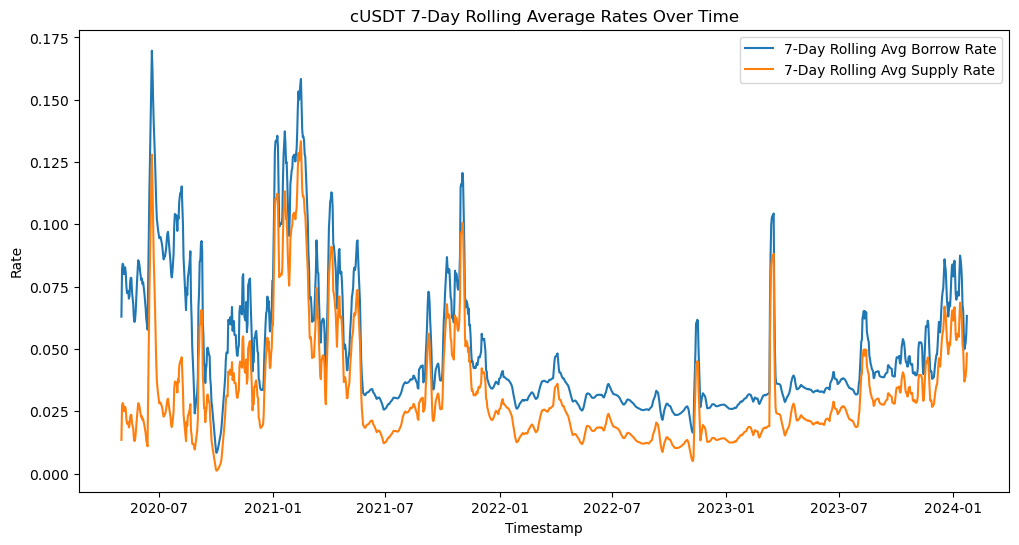

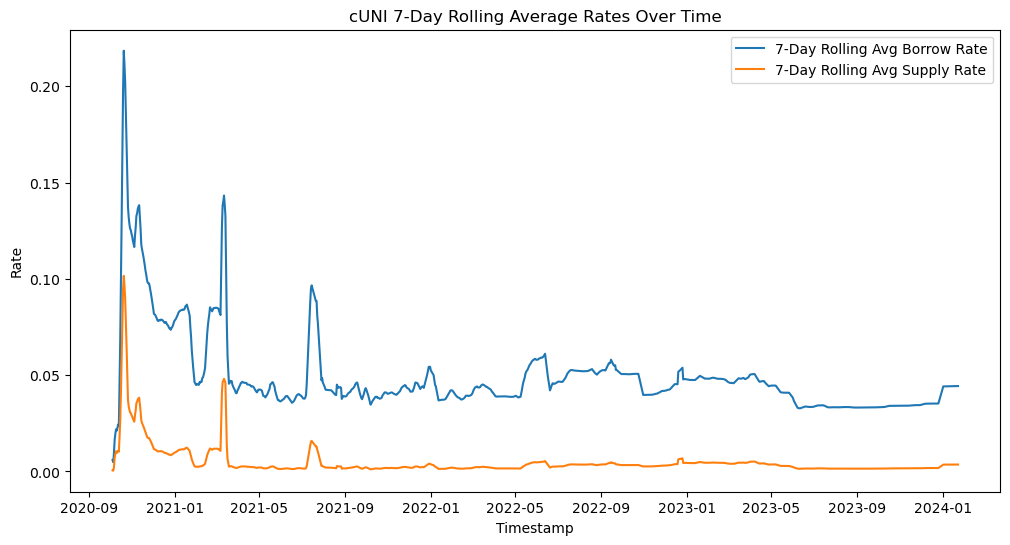

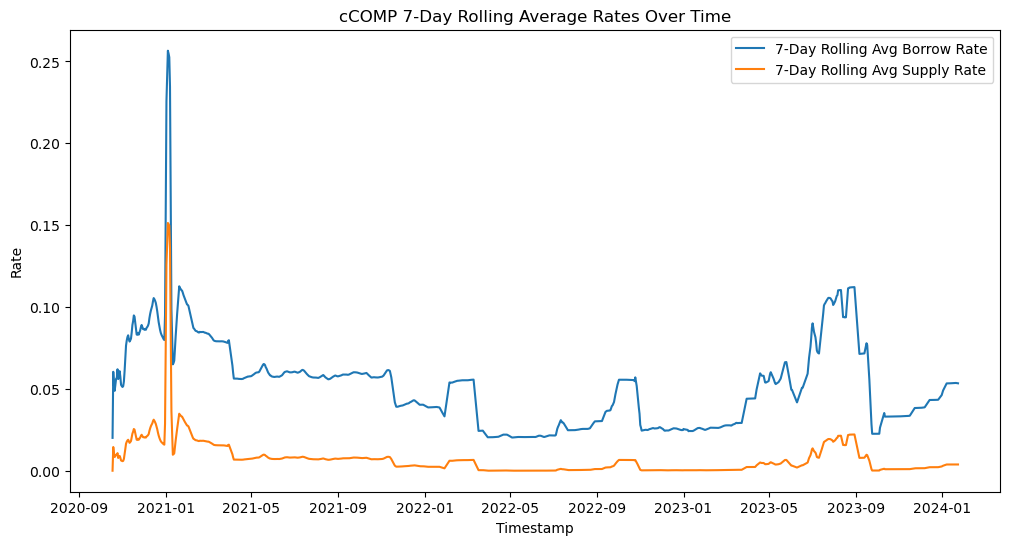

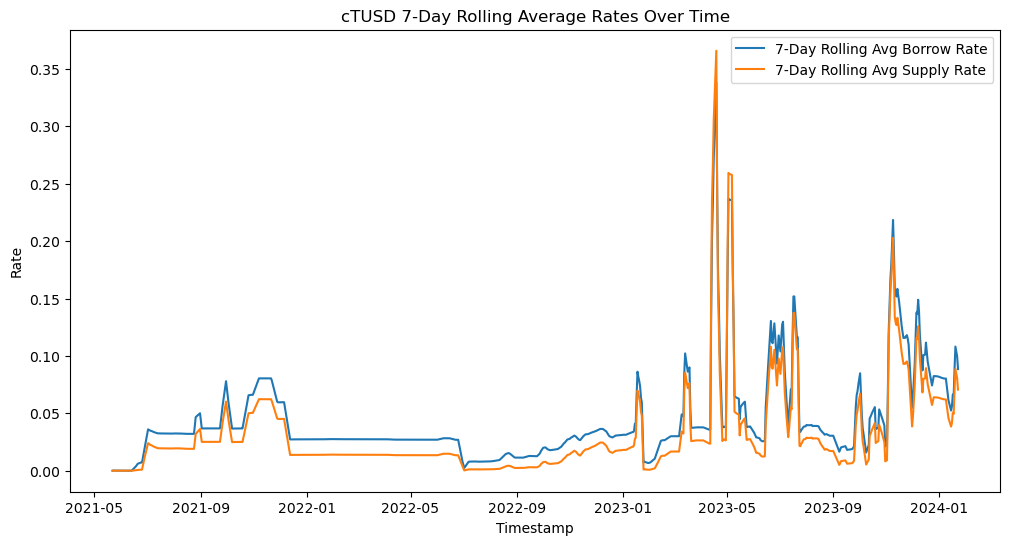

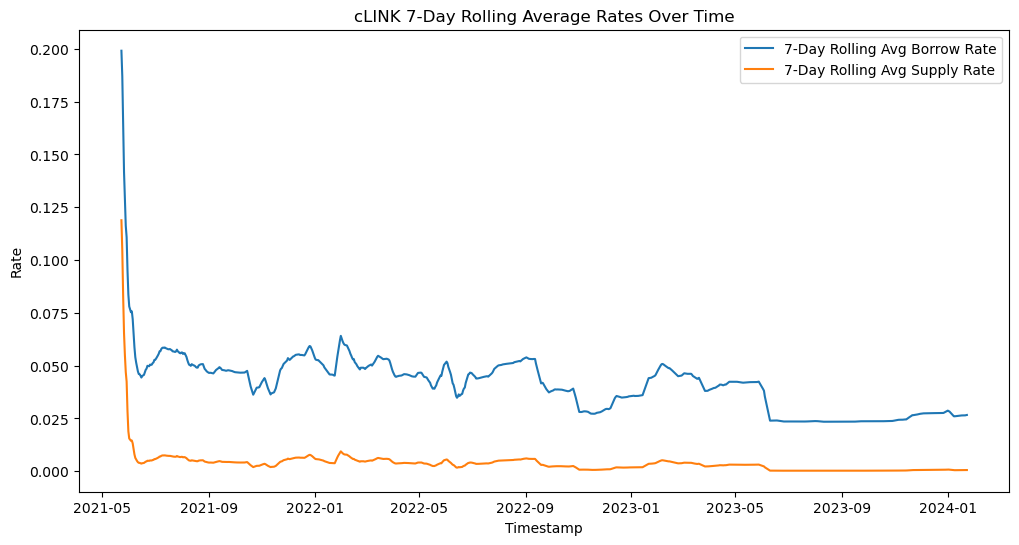

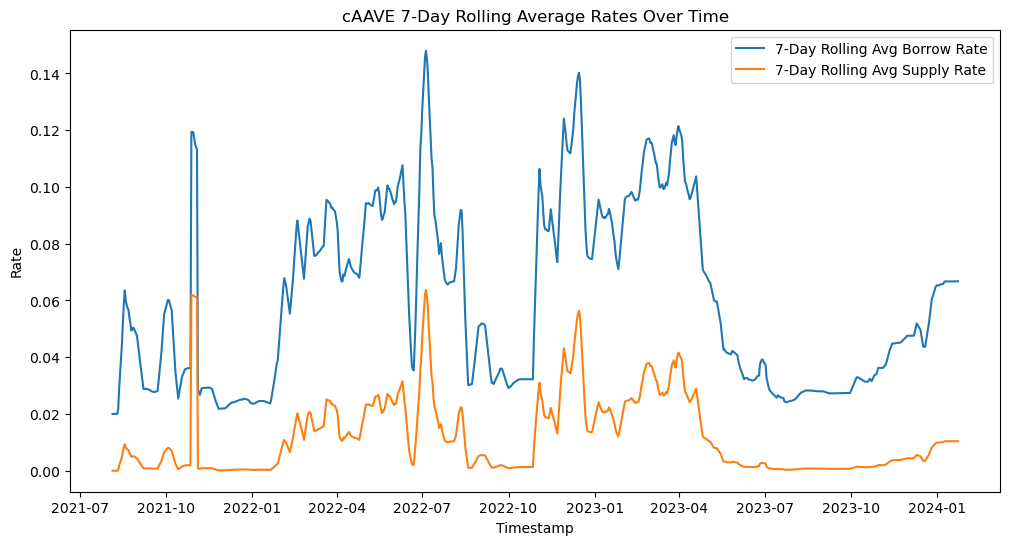

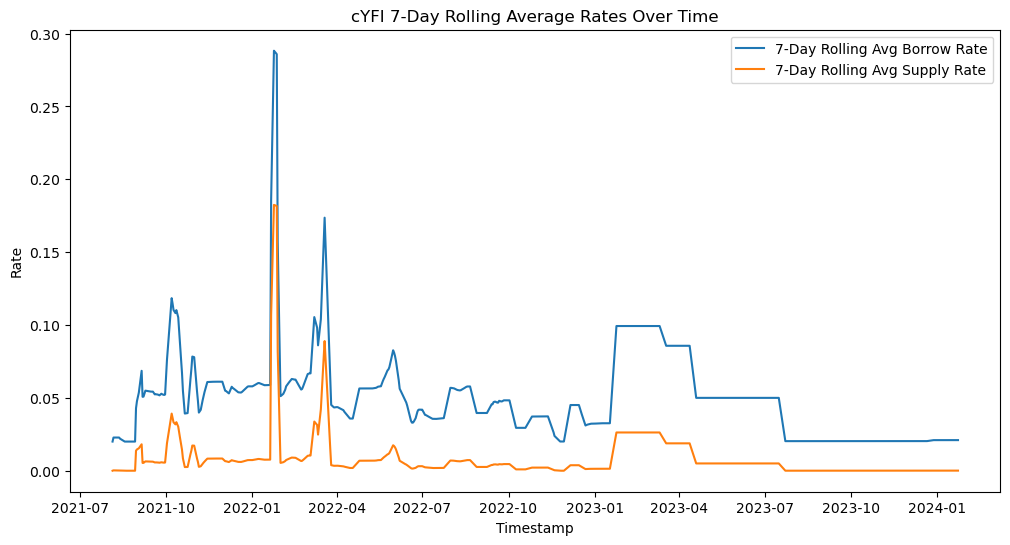

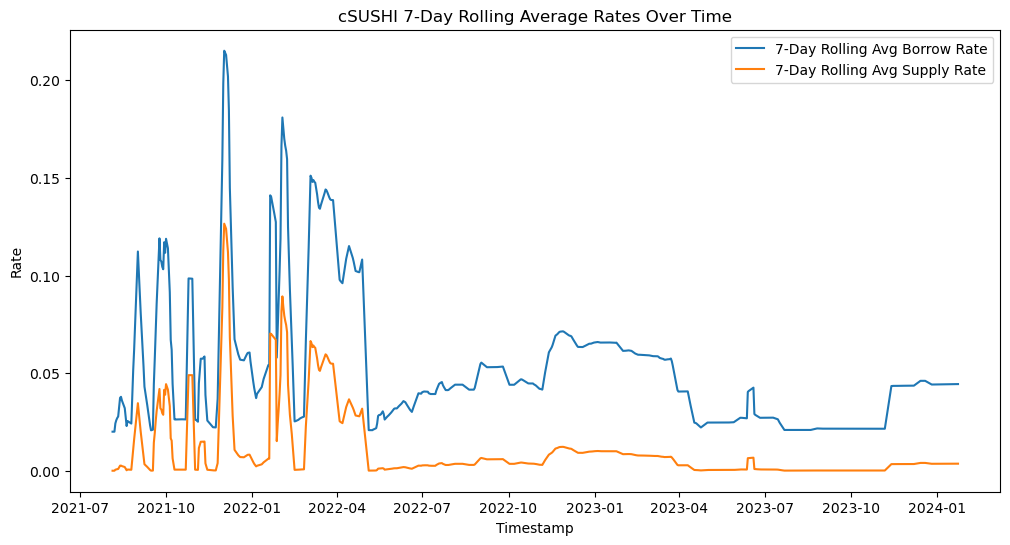

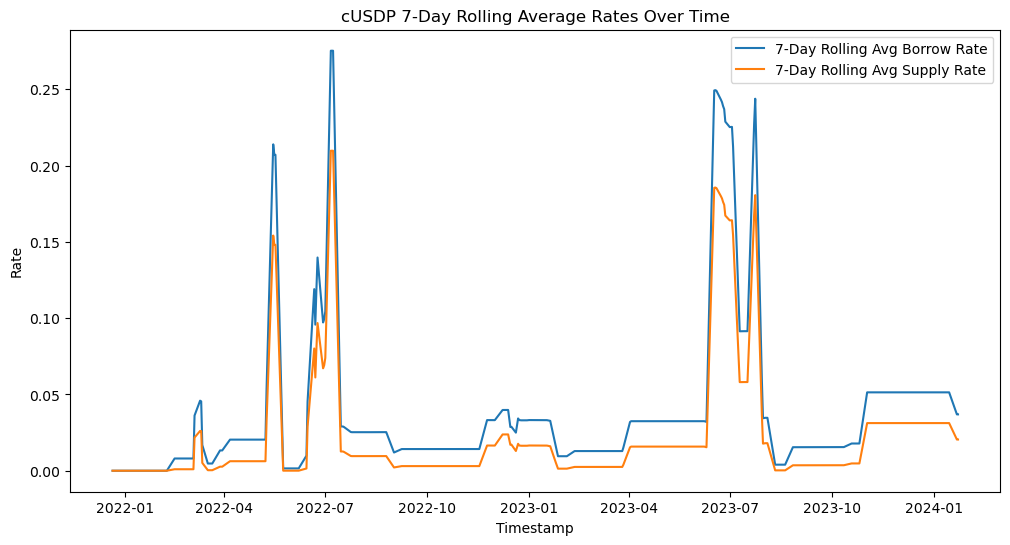

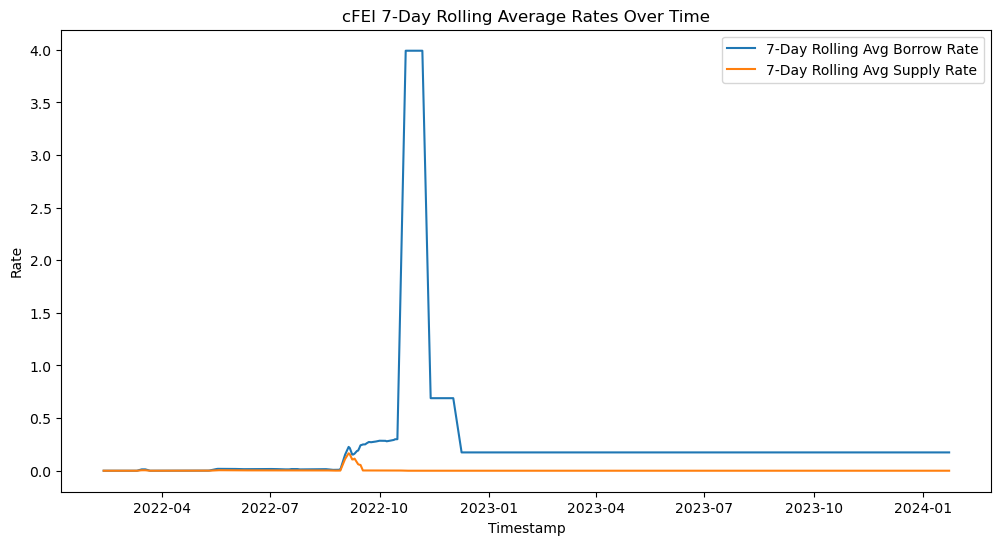

In [6]:
for symbol in symbols:
    # Filter the data for the current symbol
    symbol_data = compound_daily_interest_rates[compound_daily_interest_rates['symbol'] == symbol]
    
    # Set 'timestamp' as the index for rolling operation
    symbol_data = symbol_data.set_index('timestamp')
    
    # Calculate the 7-day rolling average
    rolling_avg = symbol_data[['borrowRate', 'supplyRate']].rolling(window=7, min_periods=1).mean()
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_avg['borrowRate'], label='7-Day Rolling Avg Borrow Rate')
    plt.plot(rolling_avg['supplyRate'], label='7-Day Rolling Avg Supply Rate')
    plt.title(f"{symbol} 7-Day Rolling Average Rates Over Time")
    plt.xlabel('Timestamp')
    plt.ylabel('Rate')
    plt.legend()
    plt.show()

## Splitting the Dataset

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure 'timestamp' is in datetime format for proper indexing and sorting
compound_daily_interest_rates['timestamp'] = pd.to_datetime(compound_daily_interest_rates['timestamp'], unit='s')

@task(name=f"Split Dataset")
def split_data_by_symbol(df, test_size=0.2):
    """
    Splits the data into training and test sets, partitioned by symbol and ordered by timestamp.
    
    Parameters:
    - df: DataFrame containing the compound interest rates data.
    - test_size: Proportion of the dataset to include in the test split.
    
    Returns:
    - train_df: DataFrame containing the training data.
    - test_df: DataFrame containing the test data.
    """
    train_frames = []
    test_frames = []
    symbols = df['symbol'].unique()
    
    for symbol in symbols:
        symbol_data = df[df['symbol'] == symbol].sort_values(by='timestamp')
        # Calculate the split index
        split_idx = int(len(symbol_data) * (1 - test_size))
        train_frames.append(symbol_data.iloc[:split_idx])
        test_frames.append(symbol_data.iloc[split_idx:])
    
    train_df = pd.concat(train_frames).reset_index(drop=True)
    test_df = pd.concat(test_frames).reset_index(drop=True)
    
    return train_df, test_df

In [8]:
compound_daily_interest_rates['timestamp'] = pd.to_datetime(compound_daily_interest_rates['timestamp'], unit='s')
train_df, test_df = split_data_by_symbol.fn(compound_daily_interest_rates, test_size=0.2)


print("Train/Validation Set:")
print(train_df.head())
print(train_df.shape)
print("\nTest Set:")
print(test_df.head())
print(test_df.shape)

Train/Validation Set:
  symbol  totalBorrows  borrowRate  totalSupply  supplyRate  \
0   cREP           1.0    0.039471    770.37388    0.002306   
1   cREP           1.0    0.039471    770.37388    0.002306   
2   cREP           1.0    0.039471    770.37388    0.002306   
3   cREP           1.0    0.039471    770.37388    0.002306   
4   cREP           1.0    0.039471    770.37388    0.002306   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           20.004143          0.02 2019-05-08              15.407478   
1           20.004143          0.02 2019-05-09              15.407478   
2           20.004143          0.02 2019-05-10              15.407478   
3           20.004143          0.02 2019-05-11              15.407478   
4           20.004143          0.02 2019-05-12              15.407478   

   totalSupplyUSD  totalBorrowUSD  
0      308.213387       20.004143  
1      308.213387       20.004143  
2      308.213387       20.004143  
3      308.21338

## Splitting the Training Dataset into Training and Validation Dataset

In [9]:
final_train_df, val_df = split_data_by_symbol.fn(train_df, test_size=0.2)

print("Train Set:")
print(final_train_df.head())
print(final_train_df.shape)
print("\nValidation Set:")
print(val_df.head())
print(val_df.shape)

Train Set:
  symbol  totalBorrows  borrowRate  totalSupply  supplyRate  \
0   cREP           1.0    0.039471    770.37388    0.002306   
1   cREP           1.0    0.039471    770.37388    0.002306   
2   cREP           1.0    0.039471    770.37388    0.002306   
3   cREP           1.0    0.039471    770.37388    0.002306   
4   cREP           1.0    0.039471    770.37388    0.002306   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           20.004143          0.02 2019-05-08              15.407478   
1           20.004143          0.02 2019-05-09              15.407478   
2           20.004143          0.02 2019-05-10              15.407478   
3           20.004143          0.02 2019-05-11              15.407478   
4           20.004143          0.02 2019-05-12              15.407478   

   totalSupplyUSD  totalBorrowUSD  
0      308.213387       20.004143  
1      308.213387       20.004143  
2      308.213387       20.004143  
3      308.213387       20.

## Feature Engineering (Preliminary)

_Volatility Measures_: We calculate the standard deviation of key financial metrics over a rolling window of 7 days. This volatility measure helps to gauge the fluctuation levels in supply and borrow rates, as well as in other relevant financial indicators. Higher volatility signals increased risk but also the potential for greater returns, making this feature crucial for risk assessment and strategy planning.

_Time Features_: By extracting information such as the day of the week, week of the year, and month from the timestamp, we aim to capture seasonal and temporal trends that could influence interest rates. These features allow our models to account for periodic variations and potentially predict rate changes based on historical temporal patterns.

_Lag Features_: We create lagged versions of our numerical variables to incorporate historical data into our predictions. For instance, a one-day lag (_lag1) represents the previous day's values. This approach helps capture the momentum and trend direction of the market, providing context for future rate movements.

_7-day Rolling Averages_: To further refine our understanding of market dynamics, we calculate 7-day rolling averages smooth out short-term fluctuations, offering a clearer view of longer-term trends. These combined features enrich the dataset with insights into both immediate and sustained market movements.

_Moving Average Convergence Divergence (MACD)_: An advanced technical analysis tool, MACD, is utilized to identify potential buy/sell signals and trend reversals by examining the convergence and divergence of short-term and long-term moving averages of our target variables. This feature can signal shifts in market sentiment and emerging trends, aiding in strategic decision-making.

In [10]:
@task(name=f"Feature Engineering Prelim")
def feature_engineering_exclusive(df, symbols):
    processed_groups = []  # To store processed DataFrames for each symbol

    for symbol in symbols:
        symbol_data = df[df['symbol'] == symbol].copy()
        
        # Ensure 'timestamp' column is in datetime format for time feature extraction
        symbol_data['timestamp'] = pd.to_datetime(symbol_data['timestamp'], unit='s')
        
        # Time Features
        symbol_data['day_of_week'] = symbol_data['timestamp'].dt.dayofweek
        symbol_data['week_of_year'] = symbol_data['timestamp'].dt.isocalendar().week
        symbol_data['month'] = symbol_data['timestamp'].dt.month

        # Specify the features to engineer
        features = ['totalBorrows', 'totalSupply', 'underlyingPriceUSD',
                    'exchangeRate', 'totalSupplyUnderlying', 'totalSupplyUSD', 'totalBorrowUSD']

        for feature in features:
            # Volatility Measures
            symbol_data[f'{feature}_volatility_7d'] = symbol_data[feature].rolling(window=7).std()

            # Lag Features
            symbol_data[f'{feature}_lag1'] = symbol_data[feature].shift(1)

            # 7-Day Rolling Averages
            symbol_data[f'{feature}_7d_avg'] = symbol_data[feature].rolling(window=7).mean()

            # Moving Average Convergence Divergence (MACD)
            symbol_data[f'{feature}_12d_EMA'] = symbol_data[feature].ewm(span=12, adjust=False).mean()
            symbol_data[f'{feature}_26d_EMA'] = symbol_data[feature].ewm(span=26, adjust=False).mean()
            symbol_data[f'{feature}_MACD'] = symbol_data[f'{feature}_12d_EMA'] - symbol_data[f'{feature}_26d_EMA']
            symbol_data[f'{feature}_MACD_signal'] = symbol_data[f'{feature}_MACD'].ewm(span=9, adjust=False).mean()

        # Append the processed symbol data to the list
        processed_groups.append(symbol_data)

    # Concatenate all processed groups back into a single DataFrame
    final_df = pd.concat(processed_groups, ignore_index=True)
    return final_df

In [11]:
# Feature engineering in final_train_df
symbols = final_train_df['symbol'].unique()
train_df_engineered = feature_engineering_exclusive.fn(final_train_df, symbols)
train_df_engineered.columns

Index(['symbol', 'totalBorrows', 'borrowRate', 'totalSupply', 'supplyRate',
       'underlyingPriceUSD', 'exchangeRate', 'timestamp',
       'totalSupplyUnderlying', 'totalSupplyUSD', 'totalBorrowUSD',
       'day_of_week', 'week_of_year', 'month', 'totalBorrows_volatility_7d',
       'totalBorrows_lag1', 'totalBorrows_7d_avg', 'totalBorrows_12d_EMA',
       'totalBorrows_26d_EMA', 'totalBorrows_MACD', 'totalBorrows_MACD_signal',
       'totalSupply_volatility_7d', 'totalSupply_lag1', 'totalSupply_7d_avg',
       'totalSupply_12d_EMA', 'totalSupply_26d_EMA', 'totalSupply_MACD',
       'totalSupply_MACD_signal', 'underlyingPriceUSD_volatility_7d',
       'underlyingPriceUSD_lag1', 'underlyingPriceUSD_7d_avg',
       'underlyingPriceUSD_12d_EMA', 'underlyingPriceUSD_26d_EMA',
       'underlyingPriceUSD_MACD', 'underlyingPriceUSD_MACD_signal',
       'exchangeRate_volatility_7d', 'exchangeRate_lag1',
       'exchangeRate_7d_avg', 'exchangeRate_12d_EMA', 'exchangeRate_26d_EMA',
       'exc

### Nan Report

In [12]:
generate_nan_report.fn(train_df_engineered)
train_df_engineered.shape

,Missing Values,Percentage (%)
symbol,0,0.000000
totalBorrows,0,0.000000
borrowRate,0,0.000000
totalSupply,0,0.000000
supplyRate,0,0.000000
underlyingPriceUSD,0,0.000000
exchangeRate,0,0.000000
timestamp,0,0.000000
totalSupplyUnderlying,0,0.000000
totalSupplyUSD,0,0.000000


(15624, 63)

## Data Imputation

To fix the existing NaN values on the feature engineered columns, We will apply different imputation techniques/strategy to the each of the columns based on best sound reasoning.

1. <b>Volatility Measures and 7-Day Averages</b>:
For volatility measures and 7-day averages, being dependent upon a rolling window, NaN values are often located at the very beginning of the data set, where there are not enough data with which to perform the calculation of these metrics. A viable approach here is to forward fill these NaNs, as it implies that the first calculated value may represent a good proxy for missing earlier values. This method preserves the temporal integrity of the data.

2. <b>Lag Features</b>:
NaN values in lag features occur when there are no preceding values for the initial entries. Forward filling is also a plausible strategy here as it presupposes that the first value of each series is being retained from the start. Otherwise, setting the initial NaNs in lag features to 0 might be reasonable, assuming no change from a non-existent prior period.

3. <b>Growth Features and Change Ratio</b>:
Growth features and change ratios stand to mention relative changes and can have NaN values whenever the information of the prior period is lacking or it has not yet been acquired. Given that a 0% change ratio implies no change, it is set up to set NaNs in these features at zero, which means that no growth or change from a non-existent or missing previous period is observed.

4. <b>Moving Average Convergence Divergence (MACD)</b>:
The MACD is derived from exponential moving averages and was so designed as to indicate changes in the strength, direction, momentum, and duration of a trend. Using forward fill for the imputation of NaN values in MACD and its signal line is a suitable way to go, given that it assumes the trend from the first calculated value continues backwards to the start of the data set. This ensures that sudden shifts in trend indicators do not take place at the very beginning.

In [13]:
@task(name=f"Data Imputation")
def apply_imputations(group, feature_groups):
    """
    Applies imputation strategies to a given group (DataFrame) based on predefined feature groups.

    Parameters:
    - group: DataFrame group, part of a larger DataFrame split by some key (e.g., 'symbol').
    - feature_groups: Dictionary containing feature group names as keys and lists of column names as values.

    Returns:
    - DataFrame with imputations applied.
    """
    # Check if the group has less than 2 data points which affects lag and other calculations
    if len(group) < 2:
        # For groups with 1 or 0 data points, directly fill all specified features with 0
        for feature_list in feature_groups.values():
            group[feature_list] = 0
    else:
        # Apply specific imputation strategies based on feature group
        for feature_group, features in feature_groups.items():
            if feature_group == 'growth_features' or feature_group == 'change_ratio_features':
                # Set to 0 for growth features and change ratios
                group[features] = group[features].fillna(0)
            elif feature_group == 'lag_features' or feature_group == 'ema_macd_columns':
                # Forward Fill, then fill remaining NaNs (if any) with 0 for lag and EMA/MACD features
                group[features] = group[features].fillna(method='ffill').fillna(0)
            elif feature_group == 'avg_7d_features' or feature_group == 'volatility_features':
                # Use backward fill for initial NaNs, then forward fill for 7-day averages and volatility measures
                group[features] = group[features].fillna(method='bfill').fillna(method='ffill').fillna(0)

    return group

In [14]:
feature_groups = {
    'volatility_features': [
        'totalBorrows_volatility_7d', 'totalSupply_volatility_7d', 'underlyingPriceUSD_volatility_7d', 
        'exchangeRate_volatility_7d', 'totalSupplyUnderlying_volatility_7d', 'totalSupplyUSD_volatility_7d', 
        'totalBorrowUSD_volatility_7d'
    ],
    'lag_features': [
        'totalBorrows_lag1', 'totalSupply_lag1', 'underlyingPriceUSD_lag1', 
        'exchangeRate_lag1', 'totalSupplyUnderlying_lag1', 'totalSupplyUSD_lag1', 
        'totalBorrowUSD_lag1'
    ],
    'avg_7d_features': [
        'totalBorrows_7d_avg', 'totalSupply_7d_avg', 'underlyingPriceUSD_7d_avg', 
        'exchangeRate_7d_avg', 'totalSupplyUnderlying_7d_avg', 'totalSupplyUSD_7d_avg', 
        'totalBorrowUSD_7d_avg'
    ],
    'ema_macd_columns': [
        'totalBorrows_MACD', 'totalBorrows_MACD_signal', 'totalSupply_MACD', 'totalSupply_MACD_signal', 
        'underlyingPriceUSD_MACD', 'underlyingPriceUSD_MACD_signal', 'exchangeRate_MACD', 'exchangeRate_MACD_signal', 
        'totalSupplyUnderlying_MACD', 'totalSupplyUnderlying_MACD_signal', 'totalSupplyUSD_MACD', 'totalSupplyUSD_MACD_signal', 
        'totalBorrowUSD_MACD', 'totalBorrowUSD_MACD_signal'
    ]
}

In [15]:
train_df_engineered_clean = train_df_engineered.groupby('symbol').apply(lambda group: apply_imputations.fn(group, feature_groups)).reset_index(drop=True)

### NaN Report

In [16]:
generate_nan_report.fn(train_df_engineered_clean)

,Missing Values,Percentage (%)
symbol,0,0.0
totalBorrows,0,0.0
borrowRate,0,0.0
totalSupply,0,0.0
supplyRate,0,0.0
underlyingPriceUSD,0,0.0
exchangeRate,0,0.0
timestamp,0,0.0
totalSupplyUnderlying,0,0.0
totalSupplyUSD,0,0.0


Now that the dataset is now cleaned. We will create a correlational heatmap to see if there are variables/columns that are highly correlated to avoid multi-collinearity.

### Correlational Analysis

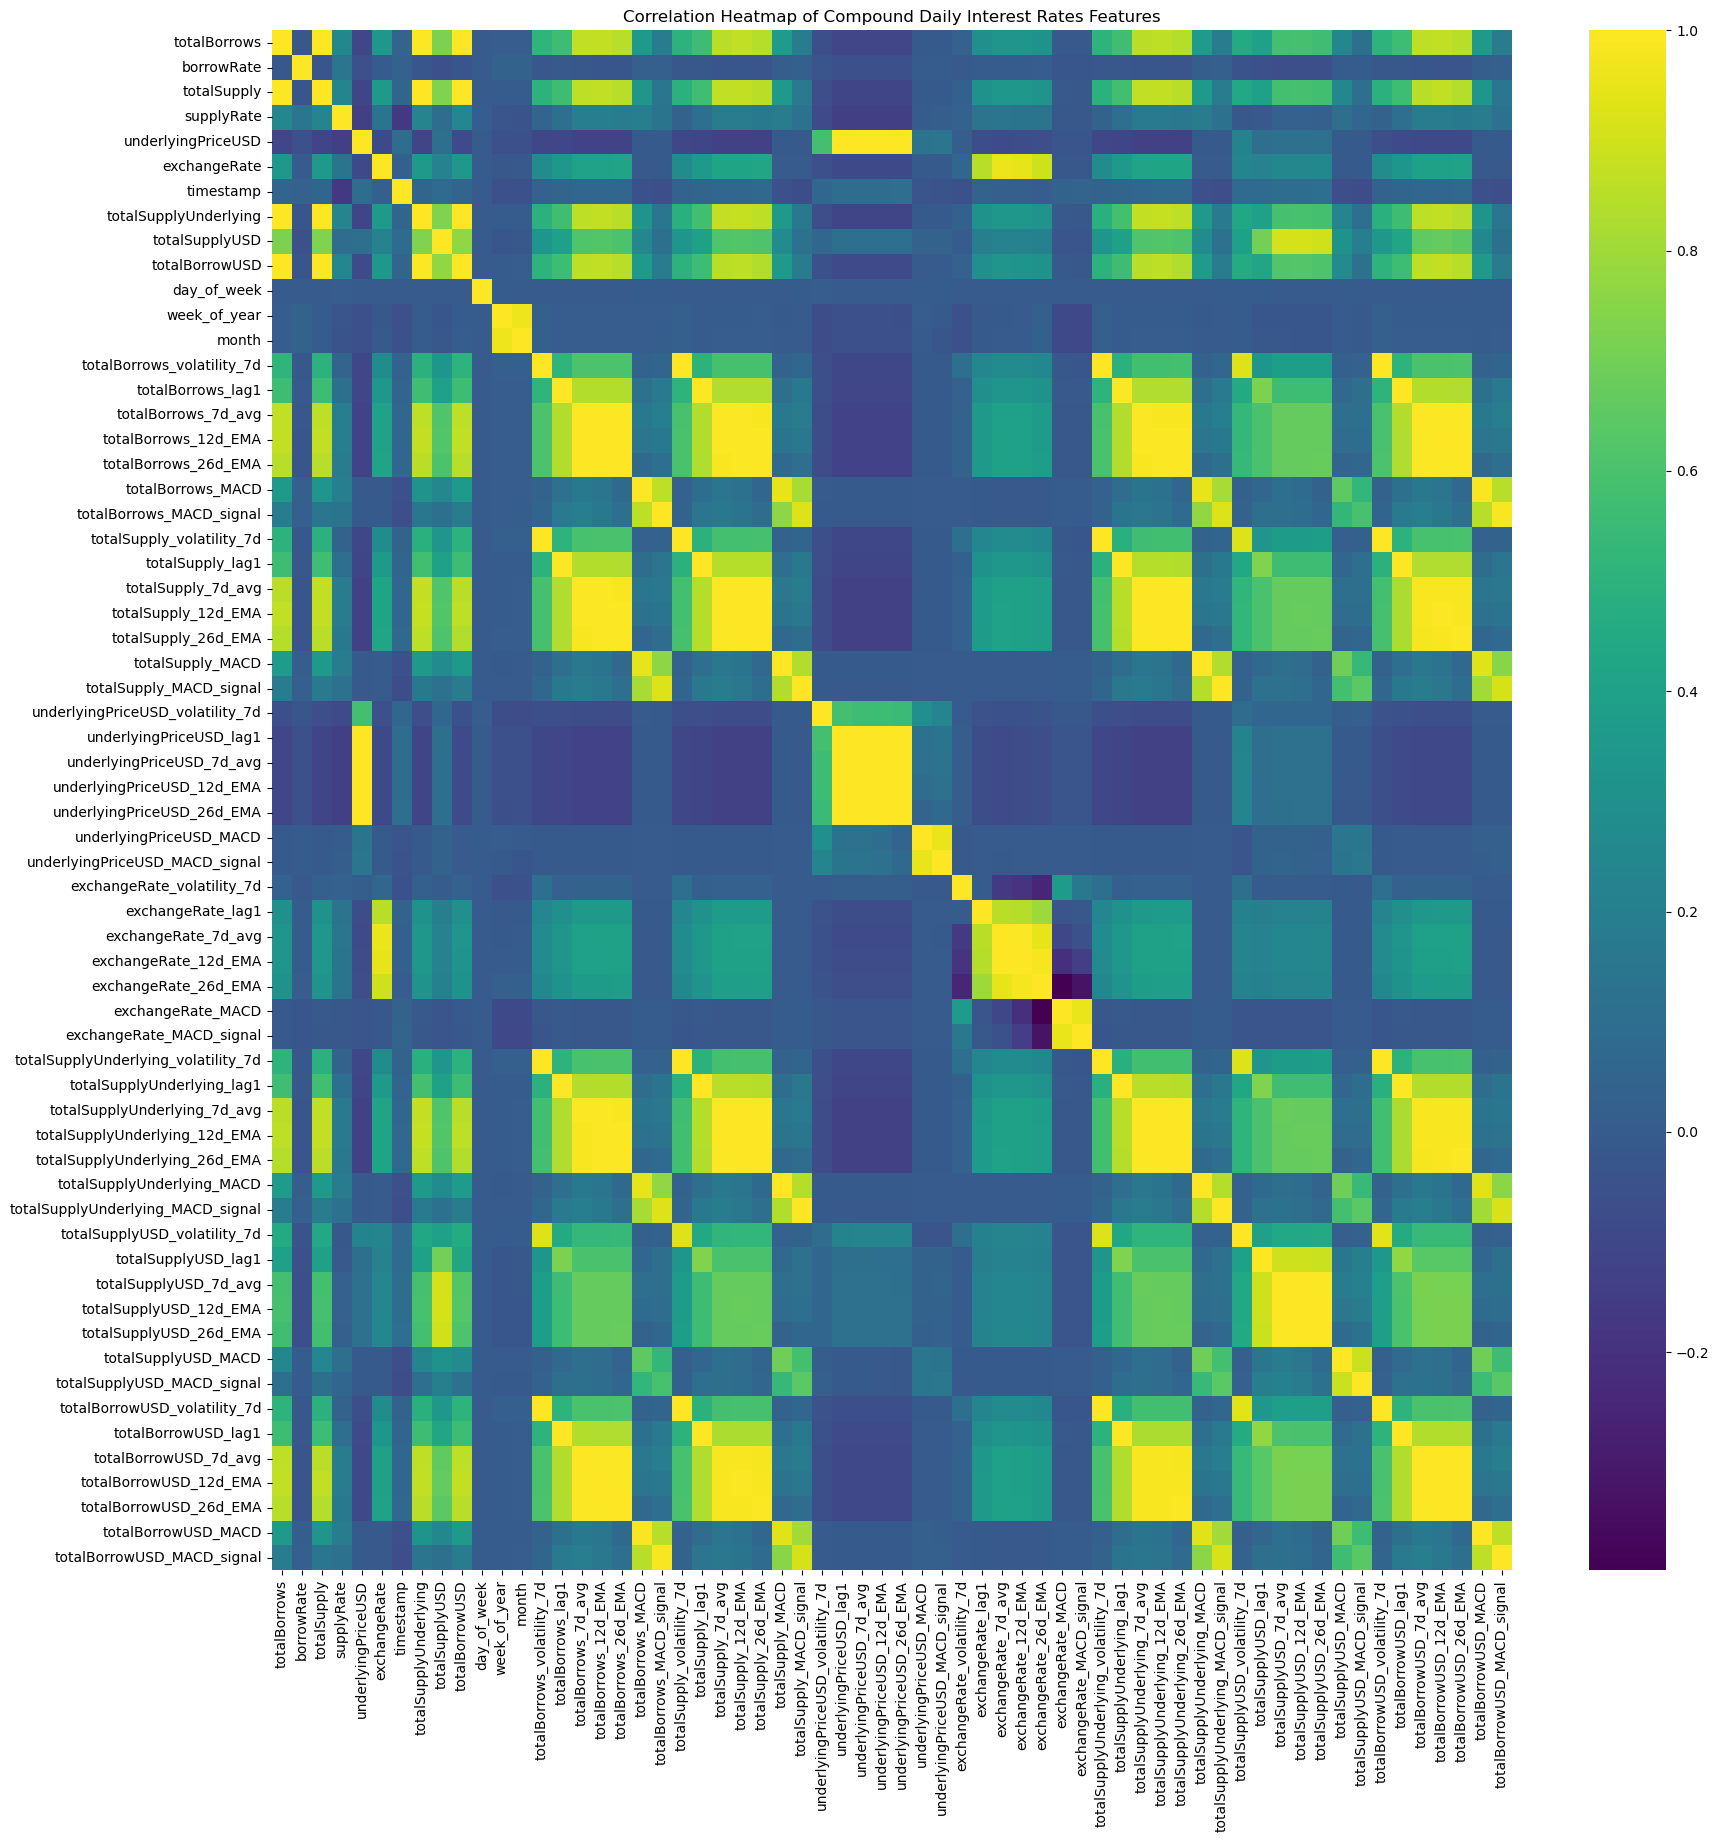

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numerical columns
train_df_engineered_clean_numerical = train_df_engineered_clean.drop(columns=['symbol'])

# Calculate correlation matrix
correlation_matrix = train_df_engineered_clean_numerical.corr()

# Generate a heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="viridis")
plt.xticks(rotation=90)  # Rotate column names for better readability
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Compound Daily Interest Rates Features')
plt.show()

We shouldn't drop all the columns that have high correlations just to avoid multicollinearity, since many of the features are feature engineered; hence, multicollinearity is expected.

## Section 1: Predicting Supply Rate

In this section, we will focus on predicting the supplyRate variable, to avoid data leakage during training but still leverage the previous historical data of supply rate we will do feature engineering with the column itself but the engineered feature will be applied on the lagged value of it.

In [18]:
@task(name=f"Feature Engineer Supply Rate/Borrow Rate")
def feature_engineering_rates(df, rate_feature):
    """
    Applies feature engineering to either supplyRate and borrowRate features
    based on their lagged values to avoid data leakage.
    """
    # Lag the rate feature to avoid data leakage
    df[f'{rate_feature}_lag1'] = df.groupby('symbol')[rate_feature].shift(1)

    # Calculate volatility on the lagged rate
    df[f'{rate_feature}_lag1_volatility_7d'] = df.groupby('symbol')[f'{rate_feature}_lag1'].transform(lambda x: x.rolling(window=7).std())

    # Calculate the 7-day rolling average on the lagged rate
    df[f'{rate_feature}_lag1_7d_avg'] = df.groupby('symbol')[f'{rate_feature}_lag1'].transform(lambda x: x.rolling(window=7).mean())

    # Calculate MACD on the lagged rate
    df[f'{rate_feature}_lag1_12d_EMA'] = df.groupby('symbol')[f'{rate_feature}_lag1'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
    df[f'{rate_feature}_lag1_26d_EMA'] = df.groupby('symbol')[f'{rate_feature}_lag1'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
    df[f'{rate_feature}_lag1_MACD'] = df[f'{rate_feature}_lag1_12d_EMA'] - df[f'{rate_feature}_lag1_26d_EMA']
    df[f'{rate_feature}_lag1_MACD_signal'] = df[f'{rate_feature}_lag1_MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())


    # Handle NaNs that were introduced by shifting and rolling
    df.fillna(method='bfill', inplace=True)
    df.fillna(method='ffill', inplace=True)

    return df

# Apply the function
train_df_engineered_supply = feature_engineering_rates.fn(train_df_engineered_clean, "supplyRate")

In [19]:
nan_counts = train_df_engineered_supply.isna().sum().sum()

print(f"Total Nan Count: {nan_counts}")

Total Nan Count: 0


In [20]:
train_df_engineered_supply.drop('borrowRate', axis=1, inplace=True)

We will drop borrowRate because we want to create another prediction model for it.
Although we can create a model that predicts the ouput of both the two variables, we already tested it and it yielded both worst performance on
the test set. This is due to the Predicting multiple targets increases the complexity of the task. The model needs to capture the underlying patterns for each target variable, which might require more data, more sophisticated features, or a more complex model architecture


### One Hot Encoding

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Define the columns for one-hot encoding and standard scaling
categorical_columns = ['symbol']
excluded_columns = categorical_columns + ['timestamp']
numerical_columns = [col for col in train_df_engineered_supply.columns if col not in excluded_columns]

# Create the column transformer
column_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(), categorical_columns),
    ('scaler', StandardScaler(), numerical_columns)
])

# Get a list of all columns in the DataFrame, excluding 'supplyRate'
columns = list(train_df_engineered_supply.columns)
columns.remove('supplyRate')

# Append 'supplyRate' to the end of the list
columns.append('supplyRate')

# Rearrange the DataFrame using the new column order
train_df_engineered_supply = train_df_engineered_supply[columns]

In [22]:
import numpy as np
import pandas as pd

# Initialize a mask to store infinity checks for numeric columns only
inf_mask = pd.DataFrame()

for column in train_df_engineered_supply.select_dtypes(include=[np.number]).columns:
    inf_mask[column] = np.isinf(train_df_engineered_supply[column])

# Check columns that contain infinity values
columns_with_inf = inf_mask.any()
print("Columns with infinity values:")
print(columns_with_inf[columns_with_inf].index.tolist())

# Find rows where any column has infinity
rows_with_inf_mask = inf_mask.any(axis=1)
if rows_with_inf_mask.any():
    print("\nRows with infinity values shape:")
    print(train_df_engineered_supply[rows_with_inf_mask].shape)

Columns with infinity values:
[]


In [23]:
#Dropping rows/entries with infinite values.
train_df_engineered_supply.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df_engineered_supply.dropna(inplace=True)

In [24]:
@task(name=f"One Hot Encoding")
def one_hot_encoding(df, column_transformer, fit_transform = True):
    if fit_transform:
        df_transformed = column_transformer.fit_transform(df)
    else:
        df_transformed = column_transformer.transform(df)
    return (df_transformed, column_transformer)

In [25]:
# Perform fit_transform on the DataFrame without 'supplyRate'
(train_df_transformed, column_transformer) = one_hot_encoding.fn(train_df_engineered_supply, column_transformer, True)
print(train_df_engineered_supply.shape)
print(train_df_transformed.shape)

(15624, 69)
(15624, 84)


### Model Training

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
# torch.backends.cudnn.deterministic = True

# Convert the csr_matrix to a dense NumPy array before slicing
X_dense = train_df_transformed[:, :-1]
y_dense = train_df_transformed[:, -1] #for supplyRates
print(f"X training variables shape: {X_dense.shape}")
print(f"y training variables shape: {y_dense.shape}")


X_tensor = torch.tensor(X_dense, dtype=torch.float32)
y_tensor = torch.tensor(y_dense, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)

train_loader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


X training variables shape: (15624, 83)
y training variables shape: (15624,)


In [27]:
class DeepNNModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(DeepNNModel, self).__init__()
        self.layers = nn.ModuleList()

        # First Linear layer
        self.layers.append(nn.Linear(input_size, hidden_layers[0]))
        # Alternating ReLU and Linear layers
        for i in range(1, len(hidden_layers)):
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
        # Final ReLU before the output layer
        self.layers.append(nn.ReLU())
        # Output layer
        self.layers.append(nn.Linear(hidden_layers[-1], output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [28]:
@task(name=f"Train Model")
def train_model(model, criterion, optimizer, train_loader, num_epochs=200, scheduler=None):
    """
    Trains a PyTorch model.

    Parameters:
    - model: The PyTorch model to be trained.
    - criterion: Loss function.
    - optimizer: Optimizer.
    - train_loader: DataLoader containing the training dataset.
    - num_epochs: Number of epochs to train for.
    - scheduler: (Optional) Learning rate scheduler.

    Returns:
    - model: The trained model.
    """
    # Check if CUDA is available and set the device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on device: {device}")

    # Move the model to the chosen device
    model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        # Step the scheduler
        if scheduler:
            scheduler.step()

        epoch_loss = running_loss / len(train_loader.dataset)

        if epoch % 10 == 0:  # Print loss every 10 epochs
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.8f}')
    
    return model

In [29]:
# Model configuration
num_features = X_tensor.shape[1]
hidden_layers = [32, 64, 32, 16]  #Deep Architecture
output_size = 1  #output/result

model = DeepNNModel(input_size=num_features, hidden_layers=hidden_layers, output_size=output_size)

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the chosen device
model = model.to(device)

# Loss function
loss_function = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Number of epochs
epochs = 100  # Increase or decrease based on the convergence of the model

# Call the train_model function with the specified parameters
model = train_model.fn(
    model=model,
    criterion=loss_function,
    optimizer=optimizer,
    train_loader=train_loader,
    num_epochs=epochs,
    scheduler=scheduler
)

Training on device: cpu
Epoch 1/100, Loss: 0.62099221
Epoch 11/100, Loss: 0.03191025
Epoch 21/100, Loss: 0.02799945
Epoch 31/100, Loss: 0.02759636
Epoch 41/100, Loss: 0.02753586
Epoch 51/100, Loss: 0.02753114
Epoch 61/100, Loss: 0.02753089
Epoch 71/100, Loss: 0.02753088
Epoch 81/100, Loss: 0.02753089
Epoch 91/100, Loss: 0.02753089


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

@task(name=f"Model Evaluation")
def evaluate_model(model, X_tensor, y_tensor, dataset_type='Training'):
    """
    Evaluates the given model using RMSE and R2-score.

    Parameters:
    - model: The trained PyTorch model.
    - X_tensor: Features tensor.
    - y_tensor: Target tensor.
    - dataset_type: A string indicating the dataset type (e.g., 'Training', 'Validation', 'Test').

    Returns:
    - None
    """
    eval_dataset = TensorDataset(X_tensor, y_tensor)
    eval_loader = DataLoader(dataset=eval_dataset, batch_size=64, shuffle=False)

    model.eval()  # Set the model to evaluation mode
    device = next(model.parameters()).device  # Get the device model is on

    predictions = []
    true_values = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in eval_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move to same device as model
            outputs = model(inputs)

            # Store predictions and true values
            predictions.extend(outputs.cpu().numpy())
            true_values.extend(labels.cpu().numpy())

    # Calculate evaluation metrics
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)

    # Print results
    print(f"{dataset_type} RMSE: {rmse}")
    print(f"{dataset_type} R-squared (R²) score: {r2}")

In [31]:
evaluate_model.fn(model, X_tensor, y_tensor)

Training RMSE: 0.1659243404865265
Training R-squared (R²) score: 0.9724691146547828


### Validation and Test Set Evaluation

This will be the steps that we will do for validation evaluation:

1. Feature Engineering the validation / test dataset
2. Clean the validation / test dataset using the apply_imputations function
3. Check for Nan values, for double checking
4. Apply feature engineering with the supply rate variable
5. Transform the dataset using the columnTransformed train by the training dataset.

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from torch.utils.data import DataLoader, TensorDataset
import torch
import numpy as np

@task(name="Evaluate Dataset")
def evaluate_dataset(df, column_transformer, model, feature_groups, rate_feature, dataset_type='validation', batch_size=64):
    """
    Evaluates the dataset by applying feature engineering, cleaning, transforming,
    and calculating evaluation metrics. Uses the .fn() calling convention for tasks.

    Parameters:
    - df: DataFrame to evaluate.
    - column_transformer: Fitted ColumnTransformer for dataset transformation.
    - model: Trained PyTorch model for evaluation.
    - feature_groups: Dictionary specifying features for imputation.
    - dataset_type: Specify 'validation' or 'test' to customize print statements.
    - batch_size: Batch size for DataLoader.

    Returns:
    - None, but prints evaluation metrics.
    """
    # Feature engineering
    symbols = df['symbol'].unique()
    df_engineered = feature_engineering_exclusive.fn(df, symbols)

    # Clean the dataset
    df_engineered_clean = df_engineered.groupby('symbol').apply(lambda group: apply_imputations.fn(group, feature_groups)).reset_index(drop=True)

    # Check for NaN values
    nan_counts = df_engineered_clean.isna().sum().sum()
    print(f"Total Nan Count after cleaning: {nan_counts}")

    # Apply feature engineering with the supply rate variable
    df_engineered_supply = feature_engineering_rates.fn(df_engineered_clean, rate_feature)

    #Dropping rows/entries with infinite values.
    df_engineered_supply.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_engineered_supply.dropna(inplace=True)

    # Transform the dataset
    transformed, _ = one_hot_encoding.fn(df_engineered_supply, column_transformer, fit_transform=False)
    
    # Convert to dense format if necessary
    if isinstance(transformed, np.ndarray):
        X_dense = transformed[:, :-1]
        y_dense = transformed[:, -1]
    else:  # Assuming csr_matrix or similar
        X_dense = transformed[:, :-1].toarray()
        y_dense = transformed[:, -1].toarray()

    # Prepare tensors
    X_tensor = torch.tensor(X_dense, dtype=torch.float32)
    y_tensor = torch.tensor(y_dense, dtype=torch.float32).view(-1,1)

    eval_dataset = TensorDataset(X_tensor, y_tensor)
    eval_loader = DataLoader(dataset=eval_dataset, batch_size=batch_size, shuffle=False)

    model.eval()  # Set the model to evaluation mode

    predictions = []
    true_values = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in eval_loader:
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            true_values.extend(labels.cpu().numpy())

    # Calculate evaluation metrics
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)
    
    # Print results
    # Print results
    print(f"{dataset_type} RMSE: {rmse}")
    print(f"{dataset_type} R-squared (R²) score: {r2}")

In [33]:
# For validation dataset
evaluate_dataset.fn(val_df, column_transformer, model, feature_groups, "supplyRate", dataset_type='validation')

# For test dataset
evaluate_dataset.fn(test_df, column_transformer, model, feature_groups, "supplyRate", dataset_type='test')

Total Nan Count after cleaning: 0
validation RMSE: 0.40309765934944153
validation R-squared (R²) score: 0.9035530503473497
Total Nan Count after cleaning: 0
test RMSE: 0.24588081240653992
test R-squared (R²) score: 0.8420275842296332


It seems that our model has a good R2 score, this means hyperparameter tuning might be a futile effort or an overkill for improving the model even better. But let's further check the validity using the hold-out test set.

## Transitioning the Model to ZKML using GizaTech's AI Actions and Orion Framework

## Executing Model Training

Though we have manually trained our models, in this part we will leverage Giza AI actions to streamline the pipeline and process of training the model and evaluating it. Such that we can see the record/process of the pipeline on our Giza Workspace. Since proving will require a lot of computing resources and time. In this part we shall make our model smaller such that we can sucessfully create and download the zk proofs of the inferences of our model

In [34]:
@action(name=f"Execution", log_prints=True)
def execution():
    #Split Dataset to TrainVal and Test Set
    compound_daily_interest_rates['timestamp'] = pd.to_datetime(compound_daily_interest_rates['timestamp'], unit='s')
    train_df, test_df = split_data_by_symbol(compound_daily_interest_rates, test_size=0.2)
    print("Train/Validation Set:")
    print(train_df.head())
    print(train_df.shape)
    print("\nTest Set:")
    print(test_df.head())
    print(test_df.shape)

    #Split TrainVal Set to Training and Validadtion Set
    final_train_df, val_df = split_data_by_symbol(train_df, test_size=0.2)
    print("Train Set:")
    print(final_train_df.head())
    print(final_train_df.shape)
    print("\nValidation Set:")
    print(val_df.head())
    print(val_df.shape)

    #Engineer features from the final_train_df dataframe
    symbols = final_train_df['symbol'].unique()
    train_df_engineered = feature_engineering_exclusive(final_train_df, symbols)
    train_df_engineered.columns

    #Generate Nan report to identify features/variables to be imputed on the next step
    generate_nan_report(train_df_engineered)
    
    #Impute the NaN values
    train_df_engineered_clean = train_df_engineered.groupby('symbol').apply(lambda group: apply_imputations(group, feature_groups)).reset_index(drop=True)

    #Generate Nan report to be sure and for sanity check
    generate_nan_report(train_df_engineered_clean)

    #Feature engineer supplyRate Feature
    train_df_engineered_supply = feature_engineering_rates(train_df_engineered_clean, "supplyRate")
    
    train_df_engineered_supply.drop('borrowRate', axis=1, inplace=True)

    # Define the columns for one-hot encoding and standard scaling
    categorical_columns = ['symbol']
    excluded_columns = categorical_columns + ['timestamp']
    numerical_columns = [col for col in train_df_engineered_supply.columns if col not in excluded_columns]
    
    # Create the column transformer
    column_transformer = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(), categorical_columns),
        ('scaler', StandardScaler(), numerical_columns)
    ])
    
    # Get a list of all columns in the DataFrame, excluding 'supplyRate'
    columns = list(train_df_engineered_supply.columns)
    columns.remove('supplyRate')
    
    # Append 'supplyRate' to the end of the list
    columns.append('supplyRate')
    
    # Rearrange the DataFrame using the new column order
    train_df_engineered_supply = train_df_engineered_supply[columns]

    # Perform fit_transform on the DataFrame without 'supplyRate'
    (train_df_transformed, column_transformer) = one_hot_encoding(train_df_engineered_supply, column_transformer, True)

    X_dense = train_df_transformed[:, :-1]
    y_dense = train_df_transformed[:, -1]
    
    
    X_tensor = torch.tensor(X_dense, dtype=torch.float32)
    y_tensor = torch.tensor(y_dense, dtype=torch.float32).view(-1, 1)
    
    dataset = TensorDataset(X_tensor, y_tensor)
    
    train_loader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

    # Model configuration
    num_features = X_tensor.shape[1]
    hidden_layers = [16, 8, 4]  # NN architecture 
    output_size = 1  #output/result
    
    model = DeepNNModel(input_size=num_features, hidden_layers=hidden_layers, output_size=1)
    
    # Check if CUDA is available and set the device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Move the model to the chosen device
    model = model.to(device)
    
    # Loss function
    loss_function = nn.MSELoss()
    
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    
    # Number of epochs
    epochs = 100 
    
    # Call the train_model function with the specified parameters
    model = train_model(
        model=model,
        criterion=loss_function,
        optimizer=optimizer,
        train_loader=train_loader,
        num_epochs=epochs,
        scheduler=scheduler
    )

    #For training dataset
    evaluate_model(model, X_tensor, y_tensor)
    # For validation dataset
    evaluate_dataset(val_df, column_transformer, model, feature_groups, "supplyRate", dataset_type='validation')
    
    # For test dataset
    evaluate_dataset(test_df, column_transformer, model, feature_groups, "supplyRate", dataset_type='test')

    return (model, column_transformer)

In [35]:
#Let's excecute our Giza Task and Actions
(model, column_transformer) = execution()

09:48:34.185 | INFO    | Created flow run 'naughty-wasp' for flow 'Execution'

09:48:34.189 | INFO    | Action run 'naughty-wasp' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/20e6ddb0-77cf-4e0b-a3d3-560cd112185a

09:48:37.142 | INFO    | Action run 'naughty-wasp' - Created task run 'Split Dataset-0' for task 'Split Dataset'

09:48:37.147 | INFO    | Action run 'naughty-wasp' - Executing 'Split Dataset-0' immediately...

09:48:38.620 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

09:48:38.625 | INFO    | Action run 'naughty-wasp' - Train/Validation Set:

09:48:38.635 | INFO    | Action run 'naughty-wasp' -   symbol  totalBorrows  borrowRate  totalSupply  supplyRate  \
0   cREP           1.0    0.039471    770.37388    0.002306   
1   cREP           1.0    0.039471    770.37388    0.002306   
2   cREP           1.0    0.039471    770.37388    0.002306   
3   cREP           1.0    0.039471    770.37388    0.002306   
4   cREP           1.0    0.039471    770.37388    0.002306   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           20.004143          0.02 2019-05-08              15.407478   
1           20.004143          0.02 2019-05-09              15.407478   
2           20.004143          0.02 2019-05-10              15.407478   
3           20.004143          0.02 2019-05-11              15.407478   
4           20.004143          0.02 2019-05-12              15.407478   

   totalSupplyUSD  totalBorrowUSD  
0      308.213387       20.004143  
1      308.213387       20.004143  
2      308.213387       20.004143  
3      308.213387       20.004143  
4      308.213387       20.004143

09:48:38.640 | INFO    | Action run 'naughty-wasp' - (19541, 11)

09:48:38.643 | INFO    | Action run 'naughty-wasp' - 
Test Set:

09:48:38.651 | INFO    | Action run 'naughty-wasp' -   symbol  totalBorrows  borrowRate   totalSupply  supplyRate  \
0   cREP     56.182565    0.035373  54704.864388         0.0   
1   cREP     56.182565    0.035373  54704.864388         0.0   
2   cREP     56.182565    0.035373  54704.864388         0.0   
3   cREP     56.182565    0.035373  54704.864388         0.0   
4   cREP     56.182565    0.035373  54704.864388         0.0   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0             5.37928      0.020041 2023-02-13            1096.321546   
1             5.37928      0.020041 2023-02-14            1096.321546   
2             5.37928      0.020041 2023-02-15            1096.321546   
3             5.37928      0.020041 2023-02-16            1096.321546   
4             5.37928      0.020041 2023-02-17            1096.321546   

   totalSupplyUSD  totalBorrowUSD  
0     5897.420565      302.221747  
1     5897.420565      302.221747  
2     5897.420565      302.221747  
3     5897.420565      302.221747  
4     5897.420565      302.221747

09:48:38.655 | INFO    | Action run 'naughty-wasp' - (4897, 11)

09:48:38.982 | INFO    | Action run 'naughty-wasp' - Created task run 'Split Dataset-1' for task 'Split Dataset'

09:48:38.985 | INFO    | Action run 'naughty-wasp' - Executing 'Split Dataset-1' immediately...

09:48:40.079 | INFO    | Task run 'Split Dataset-1' - Finished in state Completed()

09:48:40.083 | INFO    | Action run 'naughty-wasp' - Train Set:

09:48:40.091 | INFO    | Action run 'naughty-wasp' -   symbol  totalBorrows  borrowRate  totalSupply  supplyRate  \
0   cREP           1.0    0.039471    770.37388    0.002306   
1   cREP           1.0    0.039471    770.37388    0.002306   
2   cREP           1.0    0.039471    770.37388    0.002306   
3   cREP           1.0    0.039471    770.37388    0.002306   
4   cREP           1.0    0.039471    770.37388    0.002306   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           20.004143          0.02 2019-05-08              15.407478   
1           20.004143          0.02 2019-05-09              15.407478   
2           20.004143          0.02 2019-05-10              15.407478   
3           20.004143          0.02 2019-05-11              15.407478   
4           20.004143          0.02 2019-05-12              15.407478   

   totalSupplyUSD  totalBorrowUSD  
0      308.213387       20.004143  
1      308.213387       20.004143  
2      308.213387       20.004143  
3      308.213387       20.004143  
4      308.213387       20.004143

09:48:40.095 | INFO    | Action run 'naughty-wasp' - (15624, 11)

09:48:40.098 | INFO    | Action run 'naughty-wasp' - 
Validation Set:

09:48:40.105 | INFO    | Action run 'naughty-wasp' -   symbol  totalBorrows  borrowRate   totalSupply  supplyRate  \
0   cREP     54.868764    0.029529  60545.349383         0.0   
1   cREP     54.868764    0.029529  60545.349383         0.0   
2   cREP     54.868764    0.029529  60545.349383         0.0   
3   cREP     54.868764    0.029529  60545.349383         0.0   
4   cREP     54.868764    0.029529  60545.349383         0.0   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           13.476027      0.020041 2022-05-13            1213.368715   
1           13.476027      0.020041 2022-05-14            1213.368715   
2           13.476027      0.020041 2022-05-15            1213.368715   
3           13.476027      0.020041 2022-05-16            1213.368715   
4           13.476027      0.020041 2022-05-17            1213.368715   

   totalSupplyUSD  totalBorrowUSD  
0    16351.389569      739.412945  
1    16351.389569      739.412945  
2    16351.389569      739.412945  
3    16351.389569      739.412945  
4    16351.389569      739.412945

09:48:40.110 | INFO    | Action run 'naughty-wasp' - (3917, 11)

09:48:40.435 | INFO    | Action run 'naughty-wasp' - Created task run 'Feature Engineering Prelim-0' for task 'Feature Engineering Prelim'

09:48:40.439 | INFO    | Action run 'naughty-wasp' - Executing 'Feature Engineering Prelim-0' immediately...

09:48:41.913 | INFO    | Task run 'Feature Engineering Prelim-0' - Finished in state Completed()

09:48:42.250 | INFO    | Action run 'naughty-wasp' - Created task run 'Nan Report-0' for task 'Nan Report'

09:48:42.253 | INFO    | Action run 'naughty-wasp' - Executing 'Nan Report-0' immediately...

,Missing Values,Percentage (%)
symbol,0,0.000000
totalBorrows,0,0.000000
borrowRate,0,0.000000
totalSupply,0,0.000000
supplyRate,0,0.000000
underlyingPriceUSD,0,0.000000
exchangeRate,0,0.000000
timestamp,0,0.000000
totalSupplyUnderlying,0,0.000000
totalSupplyUSD,0,0.000000


09:48:43.288 | INFO    | Task run 'Nan Report-0' - Finished in state Completed()

09:48:43.632 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-0' for task 'Data Imputation'

09:48:43.634 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-0' immediately...

09:48:44.656 | INFO    | Task run 'Data Imputation-0' - Finished in state Completed()

09:48:44.982 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-1' for task 'Data Imputation'

09:48:44.986 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-1' immediately...

09:48:46.030 | INFO    | Task run 'Data Imputation-1' - Finished in state Completed()

09:48:46.358 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-2' for task 'Data Imputation'

09:48:46.363 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-2' immediately...

09:48:47.379 | INFO    | Task run 'Data Imputation-2' - Finished in state Completed()

09:48:47.704 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-3' for task 'Data Imputation'

09:48:47.708 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-3' immediately...

09:48:48.717 | INFO    | Task run 'Data Imputation-3' - Finished in state Completed()

09:48:49.056 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-4' for task 'Data Imputation'

09:48:49.060 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-4' immediately...

09:48:50.092 | INFO    | Task run 'Data Imputation-4' - Finished in state Completed()

09:48:50.431 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-5' for task 'Data Imputation'

09:48:50.436 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-5' immediately...

09:48:51.449 | INFO    | Task run 'Data Imputation-5' - Finished in state Completed()

09:48:51.778 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-6' for task 'Data Imputation'

09:48:51.781 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-6' immediately...

09:48:52.790 | INFO    | Task run 'Data Imputation-6' - Finished in state Completed()

09:48:53.121 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-7' for task 'Data Imputation'

09:48:53.126 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-7' immediately...

09:48:54.158 | INFO    | Task run 'Data Imputation-7' - Finished in state Completed()

09:48:54.491 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-8' for task 'Data Imputation'

09:48:54.496 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-8' immediately...

09:48:55.507 | INFO    | Task run 'Data Imputation-8' - Finished in state Completed()

09:48:55.836 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-9' for task 'Data Imputation'

09:48:55.839 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-9' immediately...

09:48:56.858 | INFO    | Task run 'Data Imputation-9' - Finished in state Completed()

09:48:57.189 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-10' for task 'Data Imputation'

09:48:57.194 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-10' immediately...

09:48:58.207 | INFO    | Task run 'Data Imputation-10' - Finished in state Completed()

09:48:58.558 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-11' for task 'Data Imputation'

09:48:58.561 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-11' immediately...

09:48:59.587 | INFO    | Task run 'Data Imputation-11' - Finished in state Completed()

09:48:59.930 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-12' for task 'Data Imputation'

09:48:59.933 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-12' immediately...

09:49:00.946 | INFO    | Task run 'Data Imputation-12' - Finished in state Completed()

09:49:01.294 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-13' for task 'Data Imputation'

09:49:01.296 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-13' immediately...

09:49:02.309 | INFO    | Task run 'Data Imputation-13' - Finished in state Completed()

09:49:02.641 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-14' for task 'Data Imputation'

09:49:02.643 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-14' immediately...

09:49:03.694 | INFO    | Task run 'Data Imputation-14' - Finished in state Completed()

09:49:04.024 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-15' for task 'Data Imputation'

09:49:04.028 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-15' immediately...

09:49:05.040 | INFO    | Task run 'Data Imputation-15' - Finished in state Completed()

09:49:05.368 | INFO    | Action run 'naughty-wasp' - Created task run 'Data Imputation-16' for task 'Data Imputation'

09:49:05.371 | INFO    | Action run 'naughty-wasp' - Executing 'Data Imputation-16' immediately...

09:49:06.400 | INFO    | Task run 'Data Imputation-16' - Finished in state Completed()

09:49:06.765 | INFO    | Action run 'naughty-wasp' - Created task run 'Nan Report-1' for task 'Nan Report'

09:49:06.767 | INFO    | Action run 'naughty-wasp' - Executing 'Nan Report-1' immediately...

,Missing Values,Percentage (%)
symbol,0,0.0
totalBorrows,0,0.0
borrowRate,0,0.0
totalSupply,0,0.0
supplyRate,0,0.0
underlyingPriceUSD,0,0.0
exchangeRate,0,0.0
timestamp,0,0.0
totalSupplyUnderlying,0,0.0
totalSupplyUSD,0,0.0


09:49:07.789 | INFO    | Task run 'Nan Report-1' - Finished in state Completed()

09:49:08.127 | INFO    | Action run 'naughty-wasp' - Created task run 'Feature Engineer Supply Rate/Borrow Rate-0' for task 'Feature Engineer Supply Rate/Borrow Rate'

09:49:08.131 | INFO    | Action run 'naughty-wasp' - Executing 'Feature Engineer Supply Rate/Borrow Rate-0' immediately...

09:49:09.182 | INFO    | Task run 'Feature Engineer Supply Rate/Borrow Rate-0' - Finished in state Completed()

09:49:09.520 | INFO    | Action run 'naughty-wasp' - Created task run 'One Hot Encoding-0' for task 'One Hot Encoding'

09:49:09.524 | INFO    | Action run 'naughty-wasp' - Executing 'One Hot Encoding-0' immediately...

09:49:10.644 | INFO    | Task run 'One Hot Encoding-0' - Finished in state Completed()

09:49:10.999 | INFO    | Action run 'naughty-wasp' - Created task run 'Train Model-0' for task 'Train Model'

09:49:11.003 | INFO    | Action run 'naughty-wasp' - Executing 'Train Model-0' immediately...

09:49:11.668 | INFO    | Task run 'Train Model-0' - Training on device: cpu

09:49:12.139 | INFO    | Task run 'Train Model-0' - Epoch 1/100, Loss: 0.90692764

09:49:17.070 | INFO    | Task run 'Train Model-0' - Epoch 11/100, Loss: 0.23231972

09:49:23.029 | INFO    | Task run 'Train Model-0' - Epoch 21/100, Loss: 0.21617880

09:49:27.993 | INFO    | Task run 'Train Model-0' - Epoch 31/100, Loss: 0.21445129

09:49:33.282 | INFO    | Task run 'Train Model-0' - Epoch 41/100, Loss: 0.21428406

09:49:38.116 | INFO    | Task run 'Train Model-0' - Epoch 51/100, Loss: 0.21426860

09:49:43.050 | INFO    | Task run 'Train Model-0' - Epoch 61/100, Loss: 0.21426838

09:49:49.137 | INFO    | Task run 'Train Model-0' - Epoch 71/100, Loss: 0.21426838

09:49:55.035 | INFO    | Task run 'Train Model-0' - Epoch 81/100, Loss: 0.21426837

09:50:00.586 | INFO    | Task run 'Train Model-0' - Epoch 91/100, Loss: 0.21426837

09:50:05.251 | INFO    | Task run 'Train Model-0' - Finished in state Completed()

09:50:05.585 | INFO    | Action run 'naughty-wasp' - Created task run 'Model Evaluation-0' for task 'Model Evaluation'

09:50:05.588 | INFO    | Action run 'naughty-wasp' - Executing 'Model Evaluation-0' immediately...

09:50:06.557 | INFO    | Task run 'Model Evaluation-0' - Training RMSE: 0.4628913104534149

09:50:06.562 | INFO    | Task run 'Model Evaluation-0' - Training R-squared (R²) score: 0.7857316255315268

09:50:06.913 | INFO    | Task run 'Model Evaluation-0' - Finished in state Completed()

09:50:07.244 | INFO    | Action run 'naughty-wasp' - Created task run 'Evaluate Dataset-0' for task 'Evaluate Dataset'

09:50:07.247 | INFO    | Action run 'naughty-wasp' - Executing 'Evaluate Dataset-0' immediately...

09:50:08.567 | INFO    | Task run 'Evaluate Dataset-0' - Total Nan Count after cleaning: 0

09:50:08.737 | INFO    | Task run 'Evaluate Dataset-0' - validation RMSE: 0.7177724242210388

09:50:08.741 | INFO    | Task run 'Evaluate Dataset-0' - validation R-squared (R²) score: 0.6941971803970681

09:50:09.101 | INFO    | Task run 'Evaluate Dataset-0' - Finished in state Completed()

09:50:09.441 | INFO    | Action run 'naughty-wasp' - Created task run 'Evaluate Dataset-1' for task 'Evaluate Dataset'

09:50:09.446 | INFO    | Action run 'naughty-wasp' - Executing 'Evaluate Dataset-1' immediately...

09:50:10.763 | INFO    | Task run 'Evaluate Dataset-1' - Total Nan Count after cleaning: 0

09:50:10.942 | INFO    | Task run 'Evaluate Dataset-1' - test RMSE: 0.3711814284324646

09:50:10.945 | INFO    | Task run 'Evaluate Dataset-1' - test R-squared (R²) score: 0.6399983259373381

09:50:11.295 | INFO    | Task run 'Evaluate Dataset-1' - Finished in state Completed()

09:50:11.657 | INFO    | Action run 'naughty-wasp' - Finished in state Completed()

The following image shows the pipeline of how the tasks and actions were executed in Giza Dashboard

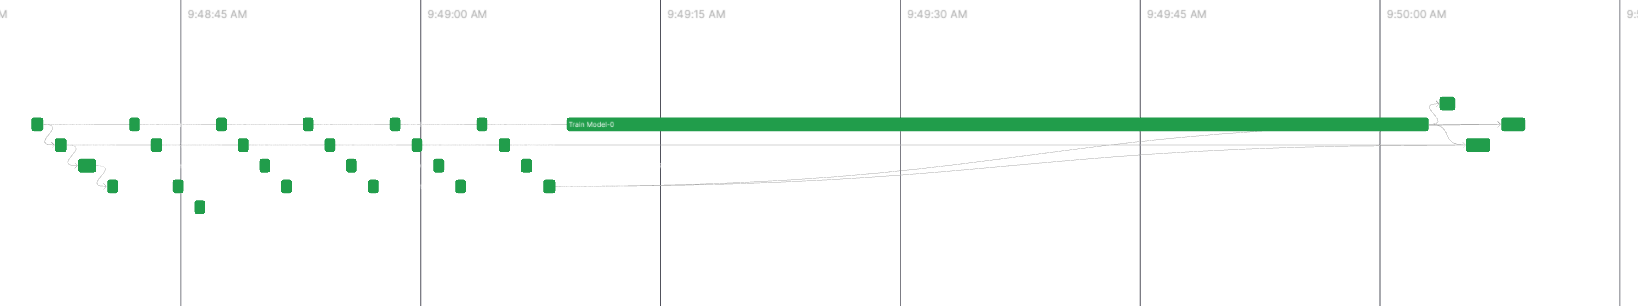

In [36]:
#Extact X_tensor and y_tensor to csv for future predictions on telegram bot

import torch
import numpy as np
import pandas as pd

# Convert to numpy arrays
X_np = X_tensor.numpy()
y_np = y_tensor.numpy()

# Option 1: Using numpy to save as CSV
np.savetxt("X_tensor_Compound_V2.csv", X_np, delimiter=",")
np.savetxt("y_tensor_Compound_V2.csv", y_np, delimiter=",")

# Option 2: Using pandas to save as CSV
X_df = pd.DataFrame(X_np)
y_df = pd.DataFrame(y_np)
X_df.to_csv("X_tensor_Compound_V2.csv", index=False)
y_df.to_csv("y_tensor_Compound_V2.csv", index=False)

## Convert Model to ONNX

In [37]:
import torch
import torch.onnx

@action(name="Model Conversion to ONNX")
def onnx_model_conversion():
    # Assuming 'input_size' is the size of model's input
    dummy_input = torch.randn(1, X_tensor.shape[1], dtype=torch.float32)
    print(X_tensor.shape[1])
    

    # Set the model to evaluation mode
    model.eval()

    # Export the model
    torch.onnx.export(model,               # model being run
                      dummy_input,         # model input (or a tuple for multiple inputs)
                      "supply_rate_model.onnx",        # where to save the model (can be a file or file-like object)
                      export_params=True,  # store the trained parameter weights inside the model file
                      opset_version=10,    # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})
    
onnx_model_conversion()

09:50:16.700 | INFO    | Created flow run 'deft-seriema' for flow 'Model Conversion to ONNX'

09:50:16.706 | INFO    | Action run 'deft-seriema' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/79cffe76-cb9e-4e51-8be2-22f8ec89b316

83


09:50:17.857 | INFO    | Action run 'deft-seriema' - Finished in state Completed()

In [38]:
import onnx

# Reading the ONNX model from file
loaded_model = onnx.load("supply_rate_model.onnx")

# Looping over all nodes within the model graph
for each_node in loaded_model.graph.node:
    print(f"Node Type: {each_node.op_type}")  # Displaying the type of operation for each node
    # Display additional information about each node
    print(f"Node Inputs: {each_node.input}, Node Outputs: {each_node.output}")
    print("===")  # Separator for readability

Node Type: Gemm
Node Inputs: ['input', 'layers.0.weight', 'layers.0.bias'], Node Outputs: ['/layers.0/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/layers.0/Gemm_output_0'], Node Outputs: ['/layers.1/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/layers.1/Relu_output_0', 'layers.2.weight', 'layers.2.bias'], Node Outputs: ['/layers.2/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/layers.2/Gemm_output_0'], Node Outputs: ['/layers.3/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/layers.3/Relu_output_0', 'layers.4.weight', 'layers.4.bias'], Node Outputs: ['/layers.4/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/layers.4/Gemm_output_0'], Node Outputs: ['/layers.5/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/layers.5/Relu_output_0', 'layers.6.weight', 'layers.6.bias'], Node Outputs: ['output']
===


## Giza Transpilation Using Giza-CLI

Below is the command used to transpile the onnx model to create a verifiable model on Cairo.

!giza transpile supply_rate_model.onnx --output-path verifiable_supply_rate_model

## Model Deployment Using Giza-CLI

Below is the command used to deploy the model.

!giza deployments deploy --model-id [model-id] --version-id [version-id] target\dev\inference.sierra

## Creating Verifiable Predictions using Giza Model

In [44]:
from giza_actions.model import GizaModel
from giza_actions.action import Action, action
from giza_actions.task import task

#Based on Giza CLI endpoint deployment, here's the parameters of our model, version, and endpoint
model_identifier = 368  # Customize with the specific model ID
version_identifier = 11 # Customize with the specific version ID
endpoint_id = 200 #endpoint ID

@task(name='Generate Prediction')
def predict_output(data_for_prediction, model_id, version_id):
    # Initialize the prediction model with the given model and version IDs.
    prediction_model = GizaModel(id=model_id, version=version_id)
    
    # Perform prediction using the model's predict method and ensure output integrity.
    prediction_result, prediction_tracking_id = prediction_model.predict(
        input_feed={"model_input": data_for_prediction}, 
        verifiable=True,
        job_size="XL"
    )
    print(prediction_result)
    print(prediction_tracking_id)
    return prediction_result, prediction_tracking_id

@action(name='Execute Prediction Process', log_prints=True)
def execute_prediction():
    single_test_sample = X_tensor.numpy().astype("float32")[1].reshape(1,-1)
    # Using a single sample from the test set for making a prediction
    prediction_result, operation_tracking_id = predict_output(single_test_sample, model_identifier, version_identifier) 
    return prediction_result, operation_tracking_id

prediction_result, proof_id = execute_prediction()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:332: UserWarning: A task named 'Generate Prediction' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:10' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:336: UserWarning: A flow named 'Execute Prediction Process' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:25' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


09:58:02.075 | INFO    | Created flow run 'merciful-starfish' for flow 'Execute Prediction Process'

09:58:02.084 | INFO    | Action run 'merciful-starfish' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/0dfe32ca-4295-410d-bb62-d7882a25a49b

09:58:03.060 | INFO    | Action run 'merciful-starfish' - Created task run 'Generate Prediction-0' for task 'Generate Prediction'

09:58:03.064 | INFO    | Action run 'merciful-starfish' - Executing 'Generate Prediction-0' immediately...

🚀 Starting deserialization process...
✅ Deserialization completed! 🎉


09:58:17.065 | INFO    | Task run 'Generate Prediction-0' - [[-0.01408386]]

09:58:17.069 | INFO    | Task run 'Generate Prediction-0' - 2fef481397e2427bb5c0b7f5334ba056

09:58:17.422 | INFO    | Task run 'Generate Prediction-0' - Finished in state Completed()

09:58:17.765 | INFO    | Action run 'merciful-starfish' - Finished in state Completed()

### ZKML Proof

Run the following on the Giza CLI to download the proof.

!giza endpoints download-proof --endpoint-id [endpoint_id] --proof-id [proof-id] --output-path supply_rate_model.proof

In [47]:
import os

#The proof of inference will be downloaded on the current working directory. Check after running the following command
os.system(f"giza endpoints download-proof --endpoint-id {endpoint_id} --proof-id {proof_id} --output-path supply_rate_model.proof")

0

Though we already attempted to make our model smaller, we are still encountering issues with downloading the zk-proof for a sample inference from our model. In the future as more computing resources can be allocated and the system for generating zk-proof from gizatech improves, this issue will be less likely. As for now, we highlighted how to leverage gizatech's framework: from using it's dataset loaders, giza actions sdk, transpiler through giza-cli, and generating and downloading zk proofs. Now we will proceed on other section of our analysis/study.

## Section 2: Predicting Borrow Rate

In [48]:
torch.backends.cudnn.deterministic = True

@action(name=f"Execution Borrow Rate", log_prints=True)
def execution_borrow_rate():
    #Split Dataset to TrainVal and Test Set
    compound_daily_interest_rates['timestamp'] = pd.to_datetime(compound_daily_interest_rates['timestamp'], unit='s')
    train_df, test_df = split_data_by_symbol(compound_daily_interest_rates, test_size=0.2)
    print("Train/Validation Set:")
    print(train_df.head())
    print(train_df.shape)
    print("\nTest Set:")
    print(test_df.head())
    print(test_df.shape)

    #Split TrainVal Set to Training and Validadtion Set
    final_train_df, val_df = split_data_by_symbol(train_df, test_size=0.2)
    print("Train Set:")
    print(final_train_df.head())
    print(final_train_df.shape)
    print("\nValidation Set:")
    print(val_df.head())
    print(val_df.shape)

    #Engineer features from the final_train_df dataframe
    symbols = final_train_df['symbol'].unique()
    train_df_engineered = feature_engineering_exclusive(final_train_df, symbols)
    train_df_engineered.columns

    #Generate Nan report to identify features/variables to be imputed on the next step
    generate_nan_report(train_df_engineered)
    
    #Impute the NaN values
    train_df_engineered_clean = train_df_engineered.groupby('symbol').apply(lambda group: apply_imputations(group, feature_groups)).reset_index(drop=True)

    #Generate Nan report to be sure and for sanity check
    generate_nan_report(train_df_engineered_clean)

    #Feature engineer borrowRate Feature
    train_df_engineered_borrow = feature_engineering_rates(train_df_engineered_clean, "borrowRate")
    
    train_df_engineered_borrow.drop('supplyRate', axis=1, inplace=True)

    # Define the columns for one-hot encoding and standard scaling
    categorical_columns = ['symbol']
    excluded_columns = categorical_columns + ['timestamp']
    numerical_columns = [col for col in train_df_engineered_borrow.columns if col not in excluded_columns]
    
    # Create the column transformer
    column_transformer = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(), categorical_columns),
        ('scaler', StandardScaler(), numerical_columns)
    ])
    
    # Get a list of all columns in the DataFrame, excluding 'supplyRate'
    columns = list(train_df_engineered_borrow.columns)
    columns.remove('borrowRate')
    
    # Append 'supplyRate' to the end of the list
    columns.append('borrowRate')
    
    # Rearrange the DataFrame using the new column order
    train_df_engineered_borrow = train_df_engineered_borrow[columns]

    # Perform fit_transform on the DataFrame without 'supplyRate'
    (train_df_transformed, column_transformer) = one_hot_encoding(train_df_engineered_borrow, column_transformer, True)

    X_dense = train_df_transformed[:, :-1]
    y_dense = train_df_transformed[:, -1]
    
    
    X_tensor = torch.tensor(X_dense, dtype=torch.float32)
    y_tensor = torch.tensor(y_dense, dtype=torch.float32).view(-1, 1)
    X_sample = X_dense[1, :]
    
    dataset = TensorDataset(X_tensor, y_tensor)
    
    train_loader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

    # Model configuration
    num_features = X_tensor.shape[1]
    hidden_layers = [16, 8, 4]  # NN architecture 
    output_size = 1  #output/result
    
    model = DeepNNModel(input_size=num_features, hidden_layers=hidden_layers, output_size=1)
    
    # Check if CUDA is available and set the device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Move the model to the chosen device
    model = model.to(device)
    
    # Loss function
    loss_function = nn.MSELoss()
    
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    # Number of epochs
    epochs = 100 
    
    # Call the train_model function with the specified parameters
    model = train_model(
        model=model,
        criterion=loss_function,
        optimizer=optimizer,
        train_loader=train_loader,
        num_epochs=epochs,
        scheduler=scheduler
    )

    #For training dataset
    evaluate_model(model, X_tensor, y_tensor)
    # For validation dataset
    evaluate_dataset(val_df, column_transformer, model, feature_groups, "borrowRate", dataset_type='validation')
    
    # For test dataset
    evaluate_dataset(test_df, column_transformer, model, feature_groups, "borrowRate", dataset_type='test')

    return (model, column_transformer, X_sample)

In [49]:
#Let's excecute our Giza Task and Actions
(borrow_rate_model, borrow_rate_column_transformer, X_sample) = execution_borrow_rate()

10:13:49.168 | INFO    | Created flow run 'daffodil-vicugna' for flow 'Execution Borrow Rate'

10:13:49.175 | INFO    | Action run 'daffodil-vicugna' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/95d2bb25-c4f2-4315-b0e1-d52f2d8cb028

10:13:50.204 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Split Dataset-0' for task 'Split Dataset'

10:13:50.208 | INFO    | Action run 'daffodil-vicugna' - Executing 'Split Dataset-0' immediately...

10:13:51.689 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

10:13:51.694 | INFO    | Action run 'daffodil-vicugna' - Train/Validation Set:

10:13:51.705 | INFO    | Action run 'daffodil-vicugna' -   symbol  totalBorrows  borrowRate  totalSupply  supplyRate  \
0   cREP           1.0    0.039471    770.37388    0.002306   
1   cREP           1.0    0.039471    770.37388    0.002306   
2   cREP           1.0    0.039471    770.37388    0.002306   
3   cREP           1.0    0.039471    770.37388    0.002306   
4   cREP           1.0    0.039471    770.37388    0.002306   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           20.004143          0.02 2019-05-08              15.407478   
1           20.004143          0.02 2019-05-09              15.407478   
2           20.004143          0.02 2019-05-10              15.407478   
3           20.004143          0.02 2019-05-11              15.407478   
4           20.004143          0.02 2019-05-12              15.407478   

   totalSupplyUSD  totalBorrowUSD  
0      308.213387       20.004143  
1      308.213387       20.004143  
2      308.213387       20.004143  
3      308.213387       20.004143  
4      308.213387       20.004143

10:13:51.708 | INFO    | Action run 'daffodil-vicugna' - (19541, 11)

10:13:51.711 | INFO    | Action run 'daffodil-vicugna' - 
Test Set:

10:13:51.723 | INFO    | Action run 'daffodil-vicugna' -   symbol  totalBorrows  borrowRate   totalSupply  supplyRate  \
0   cREP     56.182565    0.035373  54704.864388         0.0   
1   cREP     56.182565    0.035373  54704.864388         0.0   
2   cREP     56.182565    0.035373  54704.864388         0.0   
3   cREP     56.182565    0.035373  54704.864388         0.0   
4   cREP     56.182565    0.035373  54704.864388         0.0   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0             5.37928      0.020041 2023-02-13            1096.321546   
1             5.37928      0.020041 2023-02-14            1096.321546   
2             5.37928      0.020041 2023-02-15            1096.321546   
3             5.37928      0.020041 2023-02-16            1096.321546   
4             5.37928      0.020041 2023-02-17            1096.321546   

   totalSupplyUSD  totalBorrowUSD  
0     5897.420565      302.221747  
1     5897.420565      302.221747  
2     5897.420565      302.221747  
3     5897.420565      302.221747  
4     5897.420565      302.221747

10:13:51.728 | INFO    | Action run 'daffodil-vicugna' - (4897, 11)

10:13:52.080 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Split Dataset-1' for task 'Split Dataset'

10:13:52.083 | INFO    | Action run 'daffodil-vicugna' - Executing 'Split Dataset-1' immediately...

10:13:53.174 | INFO    | Task run 'Split Dataset-1' - Finished in state Completed()

10:13:53.177 | INFO    | Action run 'daffodil-vicugna' - Train Set:

10:13:53.187 | INFO    | Action run 'daffodil-vicugna' -   symbol  totalBorrows  borrowRate  totalSupply  supplyRate  \
0   cREP           1.0    0.039471    770.37388    0.002306   
1   cREP           1.0    0.039471    770.37388    0.002306   
2   cREP           1.0    0.039471    770.37388    0.002306   
3   cREP           1.0    0.039471    770.37388    0.002306   
4   cREP           1.0    0.039471    770.37388    0.002306   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           20.004143          0.02 2019-05-08              15.407478   
1           20.004143          0.02 2019-05-09              15.407478   
2           20.004143          0.02 2019-05-10              15.407478   
3           20.004143          0.02 2019-05-11              15.407478   
4           20.004143          0.02 2019-05-12              15.407478   

   totalSupplyUSD  totalBorrowUSD  
0      308.213387       20.004143  
1      308.213387       20.004143  
2      308.213387       20.004143  
3      308.213387       20.004143  
4      308.213387       20.004143

10:13:53.191 | INFO    | Action run 'daffodil-vicugna' - (15624, 11)

10:13:53.194 | INFO    | Action run 'daffodil-vicugna' - 
Validation Set:

10:13:53.203 | INFO    | Action run 'daffodil-vicugna' -   symbol  totalBorrows  borrowRate   totalSupply  supplyRate  \
0   cREP     54.868764    0.029529  60545.349383         0.0   
1   cREP     54.868764    0.029529  60545.349383         0.0   
2   cREP     54.868764    0.029529  60545.349383         0.0   
3   cREP     54.868764    0.029529  60545.349383         0.0   
4   cREP     54.868764    0.029529  60545.349383         0.0   

   underlyingPriceUSD  exchangeRate  timestamp  totalSupplyUnderlying  \
0           13.476027      0.020041 2022-05-13            1213.368715   
1           13.476027      0.020041 2022-05-14            1213.368715   
2           13.476027      0.020041 2022-05-15            1213.368715   
3           13.476027      0.020041 2022-05-16            1213.368715   
4           13.476027      0.020041 2022-05-17            1213.368715   

   totalSupplyUSD  totalBorrowUSD  
0    16351.389569      739.412945  
1    16351.389569      739.412945  
2    16351.389569      739.412945  
3    16351.389569      739.412945  
4    16351.389569      739.412945

10:13:53.208 | INFO    | Action run 'daffodil-vicugna' - (3917, 11)

10:13:53.540 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Feature Engineering Prelim-0' for task 'Feature Engineering Prelim'

10:13:53.544 | INFO    | Action run 'daffodil-vicugna' - Executing 'Feature Engineering Prelim-0' immediately...

10:13:55.050 | INFO    | Task run 'Feature Engineering Prelim-0' - Finished in state Completed()

10:13:55.381 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Nan Report-0' for task 'Nan Report'

10:13:55.384 | INFO    | Action run 'daffodil-vicugna' - Executing 'Nan Report-0' immediately...

,Missing Values,Percentage (%)
symbol,0,0.000000
totalBorrows,0,0.000000
borrowRate,0,0.000000
totalSupply,0,0.000000
supplyRate,0,0.000000
underlyingPriceUSD,0,0.000000
exchangeRate,0,0.000000
timestamp,0,0.000000
totalSupplyUnderlying,0,0.000000
totalSupplyUSD,0,0.000000


10:13:56.422 | INFO    | Task run 'Nan Report-0' - Finished in state Completed()

10:13:56.774 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-0' for task 'Data Imputation'

10:13:56.778 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-0' immediately...

10:13:57.918 | INFO    | Task run 'Data Imputation-0' - Finished in state Completed()

10:13:58.258 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-1' for task 'Data Imputation'

10:13:58.260 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-1' immediately...

10:13:59.279 | INFO    | Task run 'Data Imputation-1' - Finished in state Completed()

10:13:59.630 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-2' for task 'Data Imputation'

10:13:59.632 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-2' immediately...

10:14:00.679 | INFO    | Task run 'Data Imputation-2' - Finished in state Completed()

10:14:01.013 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-3' for task 'Data Imputation'

10:14:01.017 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-3' immediately...

10:14:02.058 | INFO    | Task run 'Data Imputation-3' - Finished in state Completed()

10:14:02.398 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-4' for task 'Data Imputation'

10:14:02.401 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-4' immediately...

10:14:03.428 | INFO    | Task run 'Data Imputation-4' - Finished in state Completed()

10:14:03.764 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-5' for task 'Data Imputation'

10:14:03.767 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-5' immediately...

10:14:04.796 | INFO    | Task run 'Data Imputation-5' - Finished in state Completed()

10:14:05.146 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-6' for task 'Data Imputation'

10:14:05.149 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-6' immediately...

10:14:06.177 | INFO    | Task run 'Data Imputation-6' - Finished in state Completed()

10:14:06.513 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-7' for task 'Data Imputation'

10:14:06.516 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-7' immediately...

10:14:07.526 | INFO    | Task run 'Data Imputation-7' - Finished in state Completed()

10:14:07.860 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-8' for task 'Data Imputation'

10:14:07.864 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-8' immediately...

10:14:08.898 | INFO    | Task run 'Data Imputation-8' - Finished in state Completed()

10:14:09.231 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-9' for task 'Data Imputation'

10:14:09.233 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-9' immediately...

10:14:10.279 | INFO    | Task run 'Data Imputation-9' - Finished in state Completed()

10:14:10.617 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-10' for task 'Data Imputation'

10:14:10.620 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-10' immediately...

10:14:11.637 | INFO    | Task run 'Data Imputation-10' - Finished in state Completed()

10:14:11.972 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-11' for task 'Data Imputation'

10:14:11.975 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-11' immediately...

10:14:13.018 | INFO    | Task run 'Data Imputation-11' - Finished in state Completed()

10:14:13.351 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-12' for task 'Data Imputation'

10:14:13.354 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-12' immediately...

10:14:14.400 | INFO    | Task run 'Data Imputation-12' - Finished in state Completed()

10:14:14.733 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-13' for task 'Data Imputation'

10:14:14.736 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-13' immediately...

10:14:15.748 | INFO    | Task run 'Data Imputation-13' - Finished in state Completed()

10:14:16.086 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-14' for task 'Data Imputation'

10:14:16.088 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-14' immediately...

10:14:17.093 | INFO    | Task run 'Data Imputation-14' - Finished in state Completed()

10:14:17.426 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-15' for task 'Data Imputation'

10:14:17.429 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-15' immediately...

10:14:18.451 | INFO    | Task run 'Data Imputation-15' - Finished in state Completed()

10:14:18.784 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Data Imputation-16' for task 'Data Imputation'

10:14:18.787 | INFO    | Action run 'daffodil-vicugna' - Executing 'Data Imputation-16' immediately...

10:14:19.836 | INFO    | Task run 'Data Imputation-16' - Finished in state Completed()

10:14:20.205 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Nan Report-1' for task 'Nan Report'

10:14:20.208 | INFO    | Action run 'daffodil-vicugna' - Executing 'Nan Report-1' immediately...

,Missing Values,Percentage (%)
symbol,0,0.0
totalBorrows,0,0.0
borrowRate,0,0.0
totalSupply,0,0.0
supplyRate,0,0.0
underlyingPriceUSD,0,0.0
exchangeRate,0,0.0
timestamp,0,0.0
totalSupplyUnderlying,0,0.0
totalSupplyUSD,0,0.0


10:14:21.233 | INFO    | Task run 'Nan Report-1' - Finished in state Completed()

10:14:21.568 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Feature Engineer Supply Rate/Borrow Rate-0' for task 'Feature Engineer Supply Rate/Borrow Rate'

10:14:21.570 | INFO    | Action run 'daffodil-vicugna' - Executing 'Feature Engineer Supply Rate/Borrow Rate-0' immediately...

10:14:22.643 | INFO    | Task run 'Feature Engineer Supply Rate/Borrow Rate-0' - Finished in state Completed()

10:14:22.995 | INFO    | Action run 'daffodil-vicugna' - Created task run 'One Hot Encoding-0' for task 'One Hot Encoding'

10:14:22.998 | INFO    | Action run 'daffodil-vicugna' - Executing 'One Hot Encoding-0' immediately...

10:14:24.109 | INFO    | Task run 'One Hot Encoding-0' - Finished in state Completed()

10:14:24.450 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Train Model-0' for task 'Train Model'

10:14:24.454 | INFO    | Action run 'daffodil-vicugna' - Executing 'Train Model-0' immediately...

10:14:25.106 | INFO    | Task run 'Train Model-0' - Training on device: cpu

10:14:25.612 | INFO    | Task run 'Train Model-0' - Epoch 1/100, Loss: 1.00636651

10:14:30.370 | INFO    | Task run 'Train Model-0' - Epoch 11/100, Loss: 0.04110063

10:14:35.191 | INFO    | Task run 'Train Model-0' - Epoch 21/100, Loss: 0.03008046

10:14:39.739 | INFO    | Task run 'Train Model-0' - Epoch 31/100, Loss: 0.02766230

10:14:44.341 | INFO    | Task run 'Train Model-0' - Epoch 41/100, Loss: 0.02706241

10:14:48.847 | INFO    | Task run 'Train Model-0' - Epoch 51/100, Loss: 0.02690804

10:14:53.379 | INFO    | Task run 'Train Model-0' - Epoch 61/100, Loss: 0.02686859

10:14:57.967 | INFO    | Task run 'Train Model-0' - Epoch 71/100, Loss: 0.02685857

10:15:02.476 | INFO    | Task run 'Train Model-0' - Epoch 81/100, Loss: 0.02685627

10:15:07.077 | INFO    | Task run 'Train Model-0' - Epoch 91/100, Loss: 0.02685591

10:15:11.636 | INFO    | Task run 'Train Model-0' - Finished in state Completed()

10:15:11.975 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Model Evaluation-0' for task 'Model Evaluation'

10:15:11.980 | INFO    | Action run 'daffodil-vicugna' - Executing 'Model Evaluation-0' immediately...

10:15:12.958 | INFO    | Task run 'Model Evaluation-0' - Training RMSE: 0.16387763619422913

10:15:12.965 | INFO    | Task run 'Model Evaluation-0' - Training R-squared (R²) score: 0.9731441211064623

10:15:13.309 | INFO    | Task run 'Model Evaluation-0' - Finished in state Completed()

10:15:13.645 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Evaluate Dataset-0' for task 'Evaluate Dataset'

10:15:13.648 | INFO    | Action run 'daffodil-vicugna' - Executing 'Evaluate Dataset-0' immediately...

10:15:14.949 | INFO    | Task run 'Evaluate Dataset-0' - Total Nan Count after cleaning: 0

10:15:15.106 | INFO    | Task run 'Evaluate Dataset-0' - validation RMSE: 0.11246421188116074

10:15:15.108 | INFO    | Task run 'Evaluate Dataset-0' - validation R-squared (R²) score: 0.4719898760286102

10:15:15.457 | INFO    | Task run 'Evaluate Dataset-0' - Finished in state Completed()

10:15:15.795 | INFO    | Action run 'daffodil-vicugna' - Created task run 'Evaluate Dataset-1' for task 'Evaluate Dataset'

10:15:15.799 | INFO    | Action run 'daffodil-vicugna' - Executing 'Evaluate Dataset-1' immediately...

10:15:17.087 | INFO    | Task run 'Evaluate Dataset-1' - Total Nan Count after cleaning: 0

10:15:17.251 | INFO    | Task run 'Evaluate Dataset-1' - test RMSE: 0.14740853011608124

10:15:17.254 | INFO    | Task run 'Evaluate Dataset-1' - test R-squared (R²) score: -1.9536294802530998

10:15:17.618 | INFO    | Task run 'Evaluate Dataset-1' - Finished in state Completed()

10:15:17.968 | INFO    | Action run 'daffodil-vicugna' - Finished in state Completed()

## Convert Model to ONNX

In [50]:
import torch
import torch.onnx

@action(name="Model Conversion to ONNX")
def onnx_model_conversion():
    # Assuming 'input_size' is the size of model's input
    dummy_input = torch.randn(1, len(X_sample), dtype=torch.float32)
    print(X_tensor.shape[1])
    

    # Set the model to evaluation mode
    model.eval()

    # Export the model
    torch.onnx.export(borrow_rate_model,               # model being run
                      dummy_input,         # model input (or a tuple for multiple inputs)
                      "borrow_rate_model.onnx",        # where to save the model (can be a file or file-like object)
                      export_params=True,  # store the trained parameter weights inside the model file
                      opset_version=10,    # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})
    
onnx_model_conversion()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:336: UserWarning: A flow named 'Model Conversion to ONNX' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:4' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


10:15:19.768 | INFO    | Created flow run 'calculating-barracuda' for flow 'Model Conversion to ONNX'

10:15:19.773 | INFO    | Action run 'calculating-barracuda' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/4c06d282-df4e-46bb-b1c0-aa5903abcf93

83


10:15:20.773 | INFO    | Action run 'calculating-barracuda' - Finished in state Completed()

In [51]:
import onnx

# Reading the ONNX model from file
loaded_model = onnx.load("borrow_rate_model.onnx")

# Looping over all nodes within the model graph
for each_node in loaded_model.graph.node:
    print(f"Node Type: {each_node.op_type}")  # Displaying the type of operation for each node
    # Display additional information about each node
    print(f"Node Inputs: {each_node.input}, Node Outputs: {each_node.output}")
    print("===")  # Separator for readability

Node Type: Gemm
Node Inputs: ['input', 'layers.0.weight', 'layers.0.bias'], Node Outputs: ['/layers.0/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/layers.0/Gemm_output_0'], Node Outputs: ['/layers.1/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/layers.1/Relu_output_0', 'layers.2.weight', 'layers.2.bias'], Node Outputs: ['/layers.2/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/layers.2/Gemm_output_0'], Node Outputs: ['/layers.3/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/layers.3/Relu_output_0', 'layers.4.weight', 'layers.4.bias'], Node Outputs: ['/layers.4/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/layers.4/Gemm_output_0'], Node Outputs: ['/layers.5/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/layers.5/Relu_output_0', 'layers.6.weight', 'layers.6.bias'], Node Outputs: ['output']
===


## Giza Transpilation Using Giza-CLI

Below is the command used to transpile the onnx model to create a verifiable model on Cairo.

!giza transpile supply_rate_model.onnx --output-path verifiable_borrow_rate_model

## Model Deployment Using Giza-CLI

Below is the command used to deploy the model.

!giza deployments deploy --model-id [model-id] --version-id [version-id] target\dev\inference.sierra

Just like previous actions we have done we will transpile the model and deploy the model using Giza CLI to create verifiable proofs.

## Creating Verifiable Proofs using GizaModel

In [54]:
from giza_actions.model import GizaModel
from giza_actions.action import Action, action
from giza_actions.task import task

model_identifier = 619  # model for borrowRates model
version_identifier = 1  # Customize with the specific version ID
endpoint_id = 203 #endpoint ID

@task(name='Generate Prediction')
def predict_output(data_for_prediction, model_id, version_id):
    # Initialize the prediction model with the given model and version IDs.
    prediction_model = GizaModel(id=model_id, version=version_id)
    
    # Perform prediction using the model's predict method and ensure output integrity.
    prediction_result, prediction_tracking_id = prediction_model.predict(
        input_feed={"model_input": data_for_prediction}, 
        verifiable=True,
        job_size="L",
    )
    print(prediction_result)
    print(prediction_tracking_id)
    return prediction_result, prediction_tracking_id

@action(name='Execute Prediction Process', log_prints=True)
def execute_prediction():
    single_test_sample = X_sample.astype("float32").reshape(1,-1)
    # Using a single sample from the test set for making a prediction
    prediction_result, operation_tracking_id = predict_output(single_test_sample, model_identifier, version_identifier) 
    return prediction_result, operation_tracking_id

prediction_result, proof_id = execute_prediction()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:332: UserWarning: A task named 'Generate Prediction' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:9' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:336: UserWarning: A flow named 'Execute Prediction Process' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:24' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


11:17:40.333 | INFO    | Created flow run 'caped-mosquito' for flow 'Execute Prediction Process'

11:17:40.337 | INFO    | Action run 'caped-mosquito' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/a77fd40c-1b51-4604-a020-c72d000e24a9

11:17:41.334 | INFO    | Action run 'caped-mosquito' - Created task run 'Generate Prediction-0' for task 'Generate Prediction'

11:17:41.339 | INFO    | Action run 'caped-mosquito' - Executing 'Generate Prediction-0' immediately...

🚀 Starting deserialization process...
✅ Deserialization completed! 🎉


11:17:55.241 | INFO    | Task run 'Generate Prediction-0' - [[0.02349854]]

11:17:55.244 | INFO    | Task run 'Generate Prediction-0' - f9fc20eab03e47fc97c0f961cf757267

11:17:55.629 | INFO    | Task run 'Generate Prediction-0' - Finished in state Completed()

11:17:55.996 | INFO    | Action run 'caped-mosquito' - Finished in state Completed()

### ZKML Proof

In [55]:
import os

#The proof of inference will be downloaded on the current working directory. Check after running the following command
os.system(f"giza endpoints download-proof --endpoint-id {endpoint_id} --proof-id {proof_id} --output-path borrow_rate_model.proof")

1

Just like with our supply rates prediction model, we are also encountering an issue with downloading the zk proof for a sample inference from our model. This is likely caused by the complexity and size of our model and the computing resources that it needs to generate a zk proof. Soon as gizatech improves the infrastracture for building zk proofs for ml models, this could become less likely of an issue.

# Conclusions

We successfully navigated the complexities of DeFi interest rates, developing predictive models that give insights on future market conditions. Our results demonstrate how important it is for accurate forecasting in areas such as risk management, portfolio optimization, algorithmic trading, financial planning, and governance for protocols within the DeFi space. In this way, we used a set of modern technologies and frameworks, which include the Gizatech Orion, Gizatech Action SDK, Gizatech Dataset Loaders, Giza Transpiler, PyTorch, Scikit-learn, Matplotlib, and Seaborn, to gather, engineer features, develop and validate models, and deploy these models for real-time forecasting.

# Recommendations

For future upgrades, once the Orion framework is further developed to support more types of neural network operators, we can look into advanced deep learning models using PyTorch or TensorFlow. Such models, when converted into ONNX, can take advantage of GizaTech's tools for creating verifiable machine learning models. Particularly, LSTM and GRU layers—specialized RNN types—carry significant potential for capturing temporal dependencies in time series data. Further, these hybrid models that combine the benefits of CNNs with LSTM or GRU layers would be a good way to further augment the forecasting capabilities while taking into account spatial-temporal patterns that are being slowly developed by such technologies for complex data 